## Titanic ML Project – Hyperparameter Tuning & Cross‑Validation


### Nome: Lucas Elias Gonçalves Peixoto Lelis de Oliveira

#### <a id="eda"></a>

### 📊EDA – Exploratory Data Analysis


- Explorando e conhecendo o dataset A partir das técnicas de EDA será descoberto as características dos dados do Titanic quanto ao:
  - Tipo 
  - Atributos 
  - Escala 
  - Frequência 
  - Distribuição 
  - Dados faltantes

-<u> Faz parte dessa etapa também a preparação dos dados, isso inclui a limpeza dos dados, correção, reescala e transformação, bem como a seleção dos atributos mais relevantes para a tarefa de classificação a ser exploradas adiante </u>


##### 1) Formatação dos atributos


Antes de analisar os atributos, precisamos unificar o formato de representação de cada coluna.

Verifique quais colunas estão com mais de uma representação de seu valor e formate para que todos os valores fiquem na mesma representação.

Por fim, realizarei a transformação de todas as colunas para o formato que empregado, dado o contexto de realização de análise de dados:


- TODO
    - 1) Visualização dos dados de cada coluna
    - 2) Formatação de cada coluna
    - 3) Remoção das linhas repetidas  
    -  4) Transformação das colunas categóricas para numéricas

#### Começando com a interpretação de todas as bibliotecas que serão utilizadas

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df_titanic = pd.read_csv(r"D:\HD 1TB\Documentos\Banco de Dados & Data Analytics\6_Trimestre-2025-03\Machine_Learning\Projetos\Titanic-Dataset-Modificado.csv", sep=',', encoding='latin')

In [172]:
df_titanic.head(5)

PassengerId  Survived  Pclass  \
0            1     False     3.0   
1            2      True     1.0   
2            3      True     3.0   
3            4      True     1.0   
4            5     False     3.0   

                                                Name     Sex           Age  \
0                            Braund, Mr. Owen Harris    male  22 years old   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female        Age 38   
2                             Heikkinen, Miss. Laina  female            26   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female            35   
4                           Allen, Mr. William Henry    male  35 years old   

   SibSp  Parch            Ticket     Fare Cabin Embarked  day  month  year  \
0      1      0         A/5 21171   7.2500   NaN        S   10      1  1912   
1      1      0          PC 17599  71.2833   C85        C    5      1  1912   
2      0      0  STON/O2. 3101282   7.9250   NaN        S   11      3  1912   
3      1      0            113803  53.1000  C123        S   18      3  1912   
4      0      0            373450   8.0500   NaN        S   14      1  1912   

    time     cost    budget  
0  01:17  0.86425       NaN  
1  22:46      NaN       NaN  
2  12:27      NaN  0.999252  
3  23:49      NaN       NaN  
4  02:01      NaN       NaN

In [173]:
df_titanic.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1069 non-null   int64  
 1   Survived     1069 non-null   bool   
 2   Pclass       985 non-null    float64
 3   Name         1069 non-null   object 
 4   Sex          985 non-null    object 
 5   Age          855 non-null    object 
 6   SibSp        1069 non-null   int64  
 7   Parch        1069 non-null   int64  
 8   Ticket       1069 non-null   object 
 9   Fare         1069 non-null   float64
 10  Cabin        248 non-null    object 
 11  Embarked     983 non-null    object 
 12  day          1069 non-null   int64  
 13  month        1069 non-null   int64  
 14  year         1069 non-null   int64  
 15  time         1069 non-null   object 
 16  cost         202 non-null    float64
 17  budget       128 non-null    float64
dtypes: bool(1), float64(4), int64(6), object(7)
memo

- Visualizando a porcentagem de valores que estão ausentes em todas as colunas do ***Dataset***

In [174]:
round((df_titanic.isna().sum()/df_titanic.shape[0]) * 100,2)

PassengerId     0.00
Survived        0.00
Pclass          7.86
Name            0.00
Sex             7.86
Age            20.02
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          76.80
Embarked        8.04
day             0.00
month           0.00
year            0.00
time            0.00
cost           81.10
budget         88.03
dtype: float64

> Como temos a coluna de identificação para cada passageiro que embarcou, acredito que já remover os dados duplicados por ID, é uma etapa necessária:

In [175]:
duplicated_id = df_titanic.duplicated()
print('Números de dados duplicados, por linha: %d' % (duplicated_id.sum()))

Números de dados duplicados, por linha: 178


In [176]:
df_titanic.duplicated(subset=['PassengerId']).sum()

np.int64(178)

In [177]:
df_titanic[df_titanic.duplicated(subset=['PassengerId'], keep=False)].sort_values('PassengerId')


PassengerId  Survived  Pclass  \
5               6     False     3.0   
1055            6     False     3.0   
927            24      True     1.0   
23             24      True     1.0   
25             26      True     3.0   
...           ...       ...     ...   
1035          886     False     3.0   
909           887     False     2.0   
886           887     False     2.0   
963           890      True     1.0   
889           890      True     1.0   

                                                   Name     Sex           Age  \
5                                      Moran, Mr. James    male           NaN   
1055                                   Moran, Mr. James    male           NaN   
927                        Sloper, Mr. William Thompson    male            28   
23                         Sloper, Mr. William Thompson    male            28   
25    Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38 years old   
...                                                 ...     ...           ...   
1035               Rice, Mrs. William (Margaret Norton)  female          39.0   
909                               Montvila, Rev. Juozas    male  estimated 27   
886                               Montvila, Rev. Juozas    male  estimated 27   
963                               Behr, Mr. Karl Howell    male          26.0   
889                               Behr, Mr. Karl Howell    male          26.0   

      SibSp  Parch  Ticket     Fare Cabin Embarked  day  month  year   time  \
5         0      0  330877   8.4583   NaN        Q    4      2  1912  13:56   
1055      0      0  330877   8.4583   NaN        Q    4      2  1912  13:56   
927       0      0  113788  35.5000    A6        S   10      1  1912  03:18   
23        0      0  113788  35.5000    A6        S   10      1  1912  03:18   
25        1      5  347077  31.3875   NaN        S    6      1  1912  19:39   
...     ...    ...     ...      ...   ...      ...  ...    ...   ...    ...   
1035      0      5  382652  29.1250   NaN        Q   13      3  1912  13:34   
909       0      0  211536  13.0000   NaN        S    3      2  1912  06:21   
886       0      0  211536  13.0000   NaN        S    3      2  1912  06:21   
963       0      0  111369  30.0000  C148        C   13      1  1912  03:05   
889       0      0  111369  30.0000  C148        C   13      1  1912  03:05   

          cost    budget  
5          NaN       NaN  
1055       NaN       NaN  
927  -0.061032       NaN  
23   -0.061032       NaN  
25   -0.829477 -0.040059  
...        ...       ...  
1035       NaN       NaN  
909        NaN       NaN  
886        NaN       NaN  
963  -2.658628       NaN  
889  -2.658628       NaN  

[356 rows x 18 columns]

> Removendo os dados duplicados:

In [178]:
df_titanic = df_titanic.drop_duplicates(subset=['PassengerId'], keep='first')

In [179]:
print(df_titanic.duplicated(subset=['PassengerId']).sum())


0


> Utilizando a função de Report no Pandas, para visualizar os dados de todas as colunas:

In [180]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_titanic, title= "Profilling_Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 268.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2) Formatação de cada coluna

In [181]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    bool   
 2   Pclass       823 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          823 non-null    object 
 5   Age          714 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     821 non-null    object 
 12  day          891 non-null    int64  
 13  month        891 non-null    int64  
 14  year         891 non-null    int64  
 15  time         891 non-null    object 
 16  cost         166 non-null    float64
 17  budget       110 non-null    float64
dtypes: bool(1), float64(4), int64(6), object(7)
memory usag

- Transformando a coluna `Survived`

In [182]:
df_titanic['Survived'] = df_titanic['Survived'].astype(int)


In [183]:
df_titanic['Survived'].unique()

array([0, 1])

- Transformação da Coluna `Sex` (Male, Female) em: ***1:*** *Male* e ***0:*** *Female*

In [184]:
df_titanic.Sex.unique()

array(['male', 'female', nan], dtype=object)

In [185]:
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 1, 'female': 0})

In [186]:
df_titanic.Sex.dtypes

dtype('float64')

- Tratando a Coluna `Age`: Limpando a coluna e deixando só os valores de idade em int64

In [187]:
df_titanic.Age.unique()

array(['22 years old', 'Age 38', '26', '35', '35 years old', nan,
       '54 years old', '2 years old', 'Age 27', 'Age 14', 'estimated 4',
       '58', 'Age 20', '39', '~14 yo', 'Age 55', '31', 'estimated 35',
       '34 years old', '15.0', '28', '8 years old', '38 years old',
       '19.0', '40', '66.0', 'Age 28', '42 years old', '21.0',
       '18 years old', '14.0', '27 years old', '~3 yo', '19 years old',
       '~18 yo', '7.0', '~21 yo', '49 years old', '29', '65.0', 'Age 5',
       '11', 'estimated 38', '45 years old', '4', 'estimated 29', '19',
       'Age 17', 'Age 26', '~32 yo', 'estimated 16', '26 years old',
       '32.0', '25.0', '1 years old', '30', '22', '28.0', '17',
       'estimated 33', '~16 yo', '23.0', '24', 'estimated 20', 'Age 46',
       '~26 yo', '59', 'estimated 71', 'Age 23', '34', 'estimated 34',
       '~33 yo', 'Age 37', '38.0', 'estimated 47', 'Age 22', '20.0',
       'estimated 70', '29 years old', '~24 yo', '2', '21 years old',
       '32', '~54 yo', 'Ag

> Criando uma nova coluna `age` para substituir a Coluna Original `Age`:

In [188]:
df_titanic['age'] = (
    df_titanic['Age']
    .astype(str) # convertendo toda a coluna para string
    .str.extract(r'(\d+)') #Pegando só os valores numéricos
    .astype(float) #convertendo para número
    
)

print(df_titanic['age'].unique()[:20])

[22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.]


In [189]:
df_titanic.head(16)

PassengerId  Survived  Pclass  \
0             1         0     3.0   
1             2         1     1.0   
2             3         1     3.0   
3             4         1     1.0   
4             5         0     3.0   
5             6         0     3.0   
6             7         0     1.0   
7             8         0     3.0   
8             9         1     NaN   
9            10         1     2.0   
10           11         1     NaN   
11           12         1     1.0   
12           13         0     3.0   
13           14         0     3.0   
14           15         0     3.0   
15           16         1     2.0   

                                                 Name  Sex           Age  \
0                             Braund, Mr. Owen Harris  1.0  22 years old   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  0.0        Age 38   
2                              Heikkinen, Miss. Laina  0.0            26   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.0            35   
4                            Allen, Mr. William Henry  1.0  35 years old   
5                                    Moran, Mr. James  1.0           NaN   
6                             McCarthy, Mr. Timothy J  1.0  54 years old   
7                      Palsson, Master. Gosta Leonard  1.0   2 years old   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  NaN        Age 27   
9                 Nasser, Mrs. Nicholas (Adele Achem)  0.0        Age 14   
10                    Sandstrom, Miss. Marguerite Rut  NaN   estimated 4   
11                           Bonnell, Miss. Elizabeth  0.0            58   
12                     Saundercock, Mr. William Henry  1.0        Age 20   
13                        Andersson, Mr. Anders Johan  1.0            39   
14               Vestrom, Miss. Hulda Amanda Adolfina  0.0        ~14 yo   
15                   Hewlett, Mrs. (Mary D Kingcome)   0.0        Age 55   

    SibSp  Parch            Ticket     Fare Cabin Embarked  day  month  year  \
0       1      0         A/5 21171   7.2500   NaN        S   10      1  1912   
1       1      0          PC 17599  71.2833   C85        C    5      1  1912   
2       0      0  STON/O2. 3101282   7.9250   NaN        S   11      3  1912   
3       1      0            113803  53.1000  C123        S   18      3  1912   
4       0      0            373450   8.0500   NaN        S   14      1  1912   
5       0      0            330877   8.4583   NaN        Q    4      2  1912   
6       0      0             17463  51.8625   E46        S    9      3  1912   
7       3      1            349909  21.0750   NaN        S   17      3  1912   
8       0      2            347742  11.1333   NaN      NaN    9      2  1912   
9       1      0            237736  30.0708   NaN        C   16      2  1912   
10      1      1           PP 9549  16.7000    G6      NaN   18      2  1912   
11      0      0            113783  26.5500  C103        S    1      1  1912   
12      0      0         A/5. 2151   8.0500   NaN        S   12      3  1912   
13      1      5            347082  31.2750   NaN        S    2      2  1912   
14      0      0            350406   7.8542   NaN        S   11      2  1912   
15      0      0            248706  16.0000   NaN        S   12      1  1912   

     time     cost    budget   age  
0   01:17  0.86425       NaN  22.0  
1   22:46      NaN       NaN  38.0  
2   12:27      NaN  0.999252  26.0  
3   23:49      NaN       NaN  35.0  
4   02:01      NaN       NaN  35.0  
5   13:56      NaN       NaN   NaN  
6   06:36      NaN       NaN  54.0  
7   19:19      NaN       NaN   2.0  
8   03:14      NaN       NaN  27.0  
9   08:41      NaN       NaN  14.0  
10  14:36      NaN       NaN   4.0  
11  12:26      NaN  0.157168  58.0  
12  18:33      NaN       NaN  20.0  
13  11:01      NaN       NaN  39.0  
14  13:10      NaN       NaN  14.0  
15  07:03      NaN       NaN  55.0

In [190]:
df_titanic.drop(columns=['Age'], inplace=True)


In [191]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0     3.0   
1              2         1     1.0   
2              3         1     3.0   
3              4         1     1.0   
4              5         0     3.0   
..           ...       ...     ...   
886          887         0     2.0   
887          888         1     1.0   
888          889         0     3.0   
889          890         1     1.0   
890          891         0     3.0   

                                                  Name  Sex  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  1.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  0.0      1      0   
2                               Heikkinen, Miss. Laina  0.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.0      1      0   
4                             Allen, Mr. William Henry  1.0      0      0   
..                                                 ...  ...    ...    ...   
886                              Montvila, Rev. Juozas  1.0      0      0   
887                       Graham, Miss. Margaret Edith  0.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  0.0      1      2   
889                              Behr, Mr. Karl Howell  1.0      0      0   
890                                Dooley, Mr. Patrick  1.0      0      0   

               Ticket     Fare Cabin Embarked  day  month  year   time  \
0           A/5 21171   7.2500   NaN        S   10      1  1912  01:17   
1            PC 17599  71.2833   C85        C    5      1  1912  22:46   
2    STON/O2. 3101282   7.9250   NaN        S   11      3  1912  12:27   
3              113803  53.1000  C123        S   18      3  1912  23:49   
4              373450   8.0500   NaN        S   14      1  1912  02:01   
..                ...      ...   ...      ...  ...    ...   ...    ...   
886            211536  13.0000   NaN        S    3      2  1912  06:21   
887            112053  30.0000   B42        S    4      1  1912  08:18   
888        W./C. 6607  23.4500   NaN        S   10      3  1912  08:01   
889            111369  30.0000  C148        C   13      1  1912  03:05   
890            370376   7.7500   NaN        Q    1      1  1912  07:03   

         cost    budget   age  
0    0.864250       NaN  22.0  
1         NaN       NaN  38.0  
2         NaN  0.999252  26.0  
3         NaN       NaN  35.0  
4         NaN       NaN  35.0  
..        ...       ...   ...  
886       NaN       NaN  27.0  
887       NaN       NaN  19.0  
888       NaN       NaN   NaN  
889 -2.658628       NaN  26.0  
890       NaN       NaN  32.0  

[891 rows x 18 columns]

> Gerando um Gráfico de BoxPlot Para coluna `Idade`

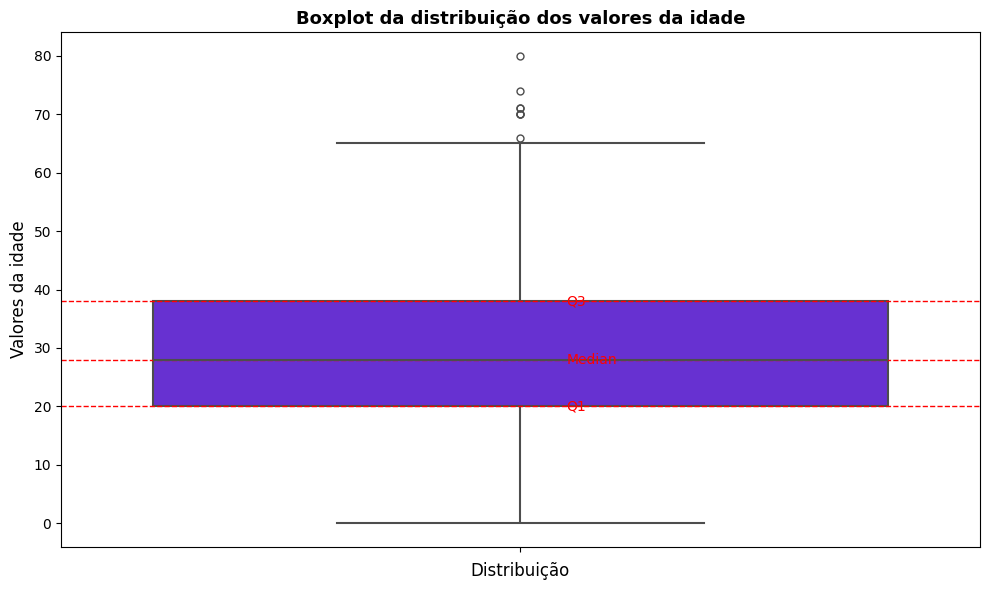

In [192]:
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data = df_titanic,
    y="age",
    color = "#5e17eb",
    fliersize =5,
    linewidth=1.5
)
plt.title("Boxplot da distribuição dos valores da idade", fontsize=13, fontweight="bold")
plt.xlabel("Distribuição", fontsize=12)
plt.ylabel("Valores da idade", fontsize=12)

#Quartis
Q1 = df_titanic['age'].quantile(0.25)
Q2 = df_titanic['age'].quantile(0.50)
Q3 = df_titanic['age'].quantile(0.75)

for i , label in zip([Q1, Q2, Q3], ["Q1", "Median", "Q3"]):
    plt.axhline(i, color="red", linestyle="--", linewidth=1)
    plt.text(0.05, i, label, rotation=0, color="red", fontsize=10, ha="left", va="center")

plt.tight_layout()
plt.show()

> Aparentemente, sem valores ausentes para essa colunad e atributos

In [193]:
round((df_titanic.isna().sum()/df_titanic.shape[0]) * 100,2)

PassengerId     0.00
Survived        0.00
Pclass          7.63
Name            0.00
Sex             7.63
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        7.86
day             0.00
month           0.00
year            0.00
time            0.00
cost           81.37
budget         87.65
age            19.87
dtype: float64

In [194]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       823 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          823 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     821 non-null    object 
 11  day          891 non-null    int64  
 12  month        891 non-null    int64  
 13  year         891 non-null    int64  
 14  time         891 non-null    object 
 15  cost         166 non-null    float64
 16  budget       110 non-null    float64
 17  age          714 non-null    float64
dtypes: float64(6), int64(7), object(5)
memory usage: 164.5+

#### 2) **Análise e escolha dos atributos que serão necessários na entrada dos algoritmos:**

- Análise de cada atributo para verificar quais possuem informação relevantes para classificar a coluna alvo.

- TODO
   - 1) Visualização dos dados
   - 2) Análise sobre possiveis relação encontradas
   - 3) Escolha das colunas mais relevântes com justificativa

> #### Como percebi que o problema no qual eu quero resolver é um problema da Classificação Binária, ou seja, dado o ***dataset titanic***, quero saber a partir de um modelo preditivo de Machine Learning, quais passageiros sobreviverem ou não, dado a escolho dos algoritmos e os atributos de entrada; 

- Atributo Alvo: coluna variável (já normalizada|0/1, sobrevivente e não sobrevivente) `Survived`

- Dessa forma, resolvi montar uma tabela com rápidas informações a respeito das colunas do meu dataset, formando um "dicionário", e a justificativa para se manter as colunas ou não, de acordo com a relevância e a resolução do problema que escolhi resolver (dado certas condições, esse conjunto de passageiros do Barco e o conjunto de várias informações, foram determinantes para sua sobrevivência ou não após após o naufrágio do Titanic)

**Análise Coluna a Coluna**
Coluna|Situação|Manter/Excluir|Justificativa
-----|-----------|-------------|--------------
PassengerId| Identificador Único|❌ Excluir|Não tem relação com sobrevivência, só serve como ID
Survived|Alvo (0/1)|✅ Manter|Variável alvo, *target*
Pclass|Classe do passageiro|✅ Manter|Altamente correlacionada com sobrevivência (1ª classe sobreviveu mais)
Name|Texto livre|❌ Excluir (direto)|Nome em si não ajuda, mas poderia ser processado para extrair título (Mr, Mrs, Miss), que é útil para prever idade e sobrevivência.
Sex|Sexo (já codificado/Male(1)/Female(0))|✅ Manter|Uma das variáveis mais fortes (mulheres tiveram maior taxa de sobrevivência).
SibSp|Nº de irmãos/cônjuges a bordo|✅ Manter|Família influencia sobrevivência (quem estava sozinho tinha menos chance).
Parch|Nº de pais/filhos a bordo|✅ Manter|Mesma lógica de SibSp.
Ticket|Texto livre|❌ Excluir|Muito ruído, pouco informativo. Só faria sentido se extraíssemos prefixos (grupo de cabine)
Fare|Tarifa paga|✅ Manter|Relacionada à classe social, logo à sobrevivência.
Cabin|77% nulos|❌ Excluir|Muitos ausentes. Poderia virar variável binária (“tem cabine” vs “não tem”), mas com tanto nulo pode atrapalhar
Embarked|Porto de embarque|✅ Manter|Pode ter influência (alguns portos tinham mais passageiros de 3ª classe). Poucos nulos, fácil de imputar.
day; month; year; time|Datas|❌ Excluir|No Titanic, todos embarcaram no mesmo dia/ano. Não trazem informação discriminativa.
cost; budget|80–90% nulos|❌ Excluir|Muito ausentes, inviáveis para imputação.
age|Idade (20% nulos)|✅ Manter|Muito relevante (crianças tiveram prioridade nos botes). Pode ser imputada (Iterative ou KNN).





> Excluindo as colunas que possuem muitos dados ausentes

In [195]:
df_titanic.drop(columns=['cost', 'budget'], inplace=True)

> #### Criando um Dicionário para ficar mais fácil a visualização de variáveis Quantitativas e Qualitativas:

In [196]:
df_titanic_dict = pd.DataFrame([
    {
        "variável":"Survived",
        "tipo": "qualitativa",
        "descrição": "Diz respeitoPassageiro sobreviveu ou não ao naufrágio"
    },

    {
        "variável":"Pclass",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
        "descrição": "Classe do Passageiro"
    },

    {
        "variável":"Name",
        "tipo": "qualitativa",
        "subtipo": "Nominal",
        "descrição": "Nome do Passageiro"
    },

     {
        "variável":"Sex",
        "tipo": "qualitativa",
        "subtipo": "Nominal",
        "descrição": "Sexo do Passageiro"
    },

     {
        "variável":"SibSp",
        "tipo": "quantitativa",
        "descrição": "Nº De Irmãos, Cônjuges a bordo"
    },

     {
        "variável":"Parch",
        "tipo": "quantitativa",
        "descrição": "Nº de Pais, fillhos a bordo"
    },

     {
        "variável":"Ticket",
        "tipo": "qualitativa",
        "descrição": "Diz respeito a informação do ticket do passageiro"
    },
     {
        "variável":"Fare",
        "tipo": "quantitativa",
        "descrição": "Diz respeito ao valor da tarifa paga, ou seja, dependendo da classe social se terá um valor mais alto"
    },

     {
        "variável":"Cabin",
        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descrição": "Cabines do passageiro"
    },

     {
        "variável":"Embarked",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
        "descrição": "Diz respeito ao embarque do passageiro ao barco"
    },

     {
        "variável":"day",
        "tipo": "temporal",
        "descrição": "No Titanic, todos embarcaram no mesmo dia/ano. Não trazem informação discriminativa."
    },

     {
        "variável":"month",
        "tipo": "temporal",
        "descrição": "No Titanic, todos embarcaram no mesmo dia/ano. Não trazem informação discriminativa."
    },

     {
        "variável":"year",
        "tipo": "temporal",
        "descrição": "No Titanic, todos embarcaram no mesmo dia/ano. Não trazem informação discriminativa."
    },

     {
        "variável":"time",
        "tipo": "temporal",
        "descrição": "No Titanic, todos embarcaram no mesmo dia/ano. Não trazem informação discriminativa."
    },
    
     {
        "variável":"age",
        "tipo": "quantitativa",
        "subtipo": "continua",
        "descrição": "Idade do Passageiro"
    }
])

In [197]:
df_titanic_dict

variável          tipo                                          descrição  \
0   Survived   qualitativa  Diz respeitoPassageiro sobreviveu ou não ao na...   
1     Pclass   qualitativa                               Classe do Passageiro   
2       Name   qualitativa                                 Nome do Passageiro   
3        Sex   qualitativa                                 Sexo do Passageiro   
4      SibSp  quantitativa                     Nº De Irmãos, Cônjuges a bordo   
5      Parch  quantitativa                        Nº de Pais, fillhos a bordo   
6     Ticket   qualitativa  Diz respeito a informação do ticket do passageiro   
7       Fare  quantitativa  Diz respeito ao valor da tarifa paga, ou seja,...   
8      Cabin   qualitativa                              Cabines do passageiro   
9   Embarked   qualitativa    Diz respeito ao embarque do passageiro ao barco   
10       day      temporal  No Titanic, todos embarcaram no mesmo dia/ano....   
11     month      temporal  No Titanic, todos embarcaram no mesmo dia/ano....   
12      year      temporal  No Titanic, todos embarcaram no mesmo dia/ano....   
13      time      temporal  No Titanic, todos embarcaram no mesmo dia/ano....   
14       age  quantitativa                                Idade do Passageiro   

     subtipo  
0        NaN  
1    ordinal  
2    Nominal  
3    Nominal  
4        NaN  
5        NaN  
6        NaN  
7        NaN  
8    nominal  
9    ordinal  
10       NaN  
11       NaN  
12       NaN  
13       NaN  
14  continua

#### - Plotando as variáveis quantitativas:



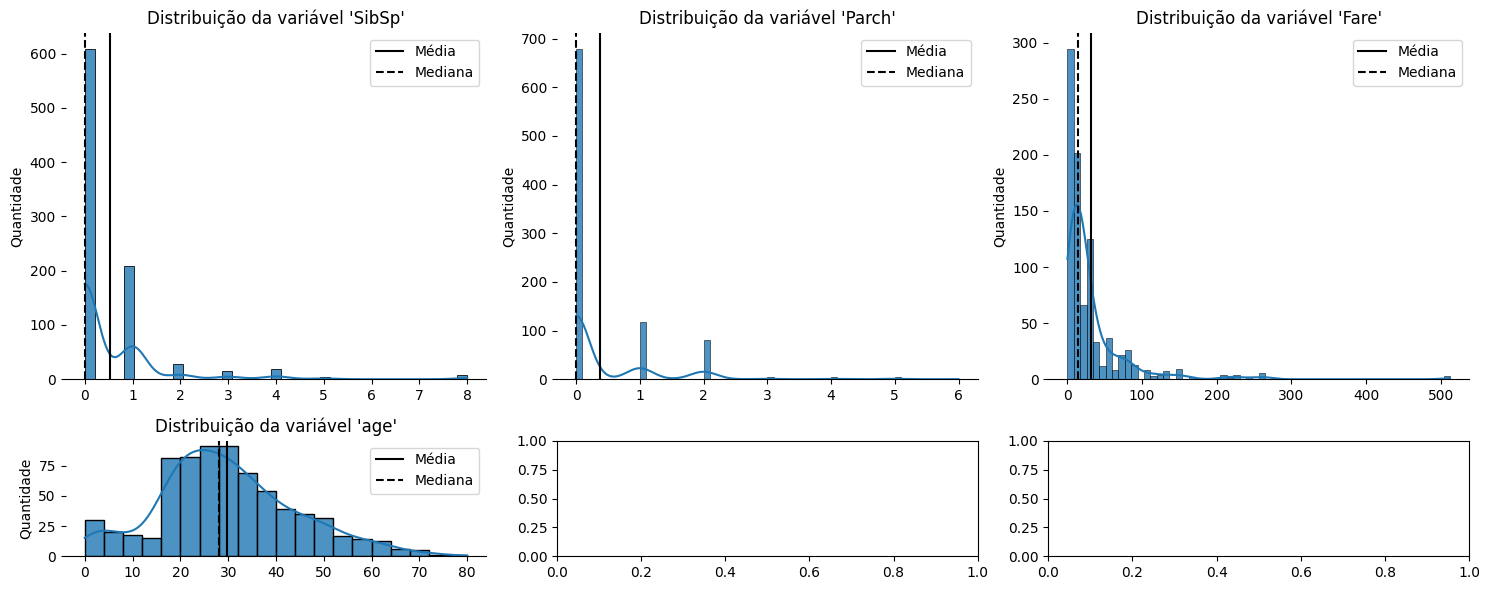

In [198]:
variaveis_quantitativas= df_titanic_dict.query('tipo == "quantitativa"').variável.to_list()

fig, axes = plt.subplots(figsize=(15,6), ncols=3, nrows=2, gridspec_kw={"height_ratios": [3, 1]})
axes = axes.flatten()  # transforma em array 1D

for i, variavel in enumerate(variaveis_quantitativas):
    ax1 = sns.histplot(data=df_titanic, x=variavel, ax=axes[i], alpha=0.8, kde=True)
    ax1.axvline(df_titanic[variavel].mean(), color='black', label="Média")
    ax1.axvline(df_titanic[variavel].median(), color='black', linestyle="--", label="Mediana")
    ax1.set(title=f"Distribuição da variável '{variavel}'", ylabel='Quantidade', xlabel="")
    ax1.legend()
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["bottom"].set_color("black")
    ax1.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()


In [199]:
df_titanic_dict

variável          tipo                                          descrição  \
0   Survived   qualitativa  Diz respeitoPassageiro sobreviveu ou não ao na...   
1     Pclass   qualitativa                               Classe do Passageiro   
2       Name   qualitativa                                 Nome do Passageiro   
3        Sex   qualitativa                                 Sexo do Passageiro   
4      SibSp  quantitativa                     Nº De Irmãos, Cônjuges a bordo   
5      Parch  quantitativa                        Nº de Pais, fillhos a bordo   
6     Ticket   qualitativa  Diz respeito a informação do ticket do passageiro   
7       Fare  quantitativa  Diz respeito ao valor da tarifa paga, ou seja,...   
8      Cabin   qualitativa                              Cabines do passageiro   
9   Embarked   qualitativa    Diz respeito ao embarque do passageiro ao barco   
10       day      temporal  No Titanic, todos embarcaram no mesmo dia/ano....   
11     month      temporal  No Titanic, todos embarcaram no mesmo dia/ano....   
12      year      temporal  No Titanic, todos embarcaram no mesmo dia/ano....   
13      time      temporal  No Titanic, todos embarcaram no mesmo dia/ano....   
14       age  quantitativa                                Idade do Passageiro   

     subtipo  
0        NaN  
1    ordinal  
2    Nominal  
3    Nominal  
4        NaN  
5        NaN  
6        NaN  
7        NaN  
8    nominal  
9    ordinal  
10       NaN  
11       NaN  
12       NaN  
13       NaN  
14  continua

In [200]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       823 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          823 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     821 non-null    object 
 11  day          891 non-null    int64  
 12  month        891 non-null    int64  
 13  year         891 non-null    int64  
 14  time         891 non-null    object 
 15  age          714 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory usage: 150.6+ KB


- Plotando vários gráficos para as variáveis categóricas:

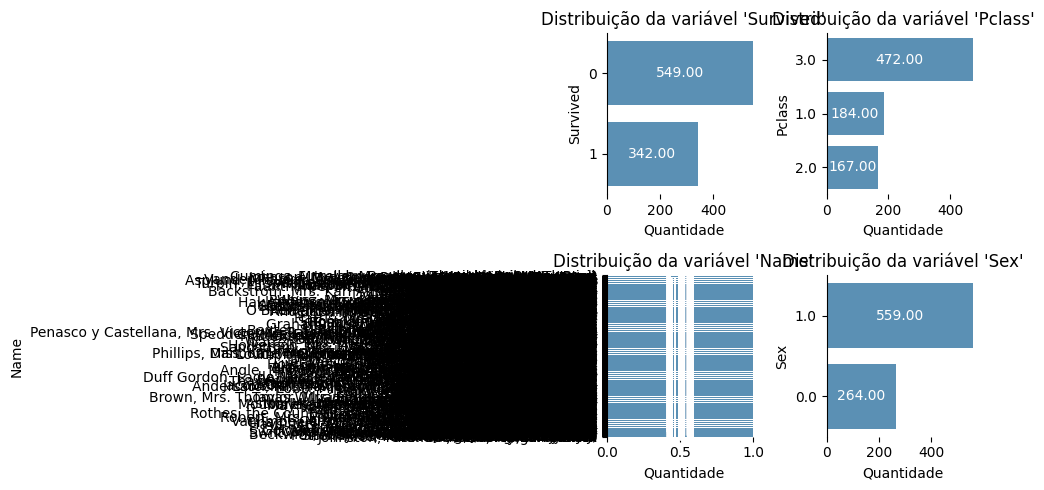

In [201]:
#%matplotlib inline

variaveis_qualitativas = df_titanic_dict.query('tipo == "qualitativa"').variável.to_list() ### pegar todas as variávies que o tipo seja qualitativa e colocá-las em uma lista

# criar figura (subplots) ### criando gráficos para as figuras qualitativas em sequência:

fig, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=2)
axes = axes.flatten() ### lista de gráficos

# plotar gráficos de histograma (um por um)
for i, axe in enumerate(axes):
    if variaveis_qualitativas[i] == "day":
        order = ["Thur", "Fri", "Sat", "Sun"]
    else:
        order = df_titanic[variaveis_qualitativas[i]].value_counts().index
    ax = sns.countplot(data=df_titanic, y=variaveis_qualitativas[i], ax=axe, order=order, alpha=0.8)
    ax.bar_label(ax.containers[0], fmt="%.2f", color="white", label_type="center")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.set(
        title=f"Distribuição da variável '{variaveis_qualitativas[i]}'",
        xlabel="Quantidade",
    )

plt.tight_layout()
plt.show()

In [202]:
df_titanic_alterado = df_titanic.copy()

In [203]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       823 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          823 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     821 non-null    object 
 11  day          891 non-null    int64  
 12  month        891 non-null    int64  
 13  year         891 non-null    int64  
 14  time         891 non-null    object 
 15  age          714 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory usage: 150.6+ KB


#### - Excluindo mais colunas que não serão úteis nesse ***dataset***



In [204]:
df_titanic_alterado.drop(columns=['PassengerId', 'day', 'month', 'year', 'time'], inplace=True)

In [205]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    823 non-null    float64
 2   Name      891 non-null    object 
 3   Sex       823 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  821 non-null    object 
 10  age       714 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 115.8+ KB


#### **Realização de Feature Engeneering** | Enriquecimento de algumas colunas:

In [206]:
nomes_unicos = df_titanic_alterado.Name.unique()


In [207]:
nomes_unicos

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

> Extraindo o título da coluna Name, isso é importante, pois pode ajudar o modelo, uma vez que pessoas com títulos maiores, podem ter sobrevivido, conseguido cabines a mais e assim sucessivamente:

In [208]:
df_titanic_alterado['Title'] = df_titanic_alterado['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()


In [209]:
df_titanic_alterado.Title.head(5)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [210]:
df_titanic_alterado.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

- Antes, é preciso agrupar os títulos Raros dessa coluna, para que a codificação e performance nos algoritmos sejam mais eficientes em termos de separação

In [211]:
titulos_raros = ['Don','Rev','Dr','Mme','Ms','Major','Lady','Sir','Mlle','Col','Capt','the Countess','Jonkheer']
df_titanic_alterado['Title'] = df_titanic_alterado['Title'].replace(titulos_raros, 'Rare')


In [212]:
df_titanic_alterado.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

> Usando o 'OneHotEncoder' para pré-processar essas colunas e transformar em colunas que sejam passíveis de se entrar nos modelos

In [213]:
from sklearn.preprocessing import OneHotEncoder

In [214]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
title_encoded = encoder.fit_transform(df_titanic_alterado[["Title"]])
title_encoded_df = pd.DataFrame(title_encoded, columns=encoder.get_feature_names_out(["Title"]))
df_titanic_alterado = pd.concat([df_titanic_alterado, title_encoded_df], axis=1)


In [215]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        823 non-null    float64
 2   Name          891 non-null    object 
 3   Sex           823 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Ticket        891 non-null    object 
 7   Fare          891 non-null    float64
 8   Cabin         204 non-null    object 
 9   Embarked      821 non-null    object 
 10  age           714 non-null    float64
 11  Title         891 non-null    object 
 12  Title_Master  891 non-null    float64
 13  Title_Miss    891 non-null    float64
 14  Title_Mr      891 non-null    float64
 15  Title_Mrs     891 non-null    float64
 16  Title_Rare    891 non-null    float64
dtypes: float64(9), int64(3), object(5)
memory usage: 157.6+ KB


In [216]:
print(df_titanic_alterado.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'age', 'Title', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')


> Criando uma coluna `FamilySize` para capturar as relações sociais neste Dataset, dado as colunas `SibSp`&& `Parch`

-   Captura relações sociais: famílias grandes tinham mais dificuldade de sobreviver juntas, enquanto famílias pequenas ou pessoas sozinhas tinham comportamento diferente.
-  	É uma feature numérica simples que pode melhorar recall/precisão, porque ajuda o modelo a distinguir perfis de passageiros.



In [217]:
df_titanic_alterado['FamilySize'] = df_titanic_alterado['SibSp'] + df_titanic_alterado['Parch'] + 1


In [218]:
survival_rate = df_titanic_alterado.groupby('FamilySize')['Survived'].mean()
print(survival_rate)


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


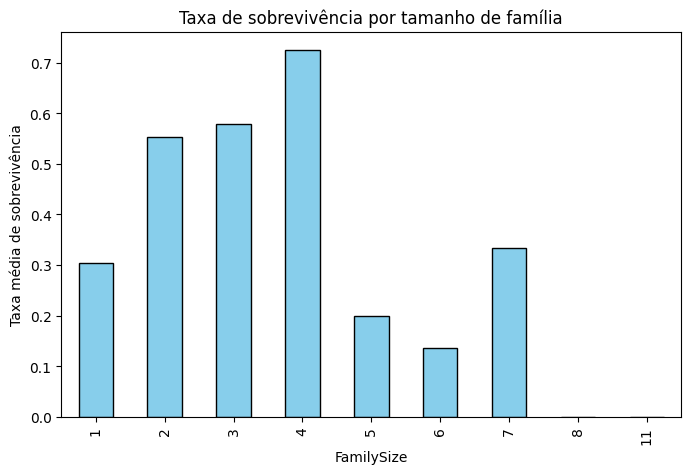

In [219]:
survival_rate.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title("Taxa de sobrevivência por tamanho de família")
plt.xlabel("FamilySize")
plt.ylabel("Taxa média de sobrevivência")
plt.show()


In [220]:
df_titanic_alterado.isna().sum()/df_titanic_alterado.shape[0] * 100

Survived         0.000000
Pclass           7.631874
Name             0.000000
Sex              7.631874
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin           77.104377
Embarked         7.856341
age             19.865320
Title            0.000000
Title_Master     0.000000
Title_Miss       0.000000
Title_Mr         0.000000
Title_Mrs        0.000000
Title_Rare       0.000000
FamilySize       0.000000
dtype: float64

> Excluindo a coluna `Name` no qual já foi extraindo as informações dos títulos e a coluna Ticket, no qual não seguirei no enriquecimento dessa coluna afim de servir como entrada no modelos, após breve pesquisa, vi que ps ganhos em predições para esse atributo não é tão significativo para este dataset

In [221]:
df_titanic_alterado.drop(columns=['Name', 'Title', 'Ticket'], inplace=True)

In [222]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        823 non-null    float64
 2   Sex           823 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Cabin         204 non-null    object 
 7   Embarked      821 non-null    object 
 8   age           714 non-null    float64
 9   Title_Master  891 non-null    float64
 10  Title_Miss    891 non-null    float64
 11  Title_Mr      891 non-null    float64
 12  Title_Mrs     891 non-null    float64
 13  Title_Rare    891 non-null    float64
 14  FamilySize    891 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 143.7+ KB


 #### 3-) Preenchimento de dados faltantes

Após a formatação e seleção das colunas relevantes, é necessário garantir que todas as colunas estejam com dados válidos em cada coluna.

- TODO

  - 1) Gerar o dataset sem as colunas com dados faltantes
  - 2) Aplicar o K-means no novo dataset (explorando o melhor valor de K)
  - 3) Cálcular um atributo estatístico (média, moda, mediana, etc), no dataset original, das colunas com dados faltantes
  - 4) Preencher os valores das linhas com dados faltantes com o atributo estatístico referente ao seu grupo do K-means

### Tratando dos Valores Ausentes por coluna, no dataset

> Imputando os valore ausentes para a colunas categóricas: `Cabin` e `Embarked`

In [223]:
df_titanic_alterado.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [224]:
df_titanic_alterado['Embarked'].fillna(df_titanic_alterado['Embarked'].mode()[0], inplace=True)


In [225]:
df_titanic_alterado.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- Como `Cabin` possui 77% dos dados ausentes, pensei em criar uma coluna `Hascabin` para imputar valores binários indicando se o passageiro tinha ou não cabine:

In [226]:
df_titanic_alterado['HasCabin'] = df_titanic_alterado['Cabin'].notna().astype(int)

In [227]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        823 non-null    float64
 2   Sex           823 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Cabin         204 non-null    object 
 7   Embarked      891 non-null    object 
 8   age           714 non-null    float64
 9   Title_Master  891 non-null    float64
 10  Title_Miss    891 non-null    float64
 11  Title_Mr      891 non-null    float64
 12  Title_Mrs     891 non-null    float64
 13  Title_Rare    891 non-null    float64
 14  FamilySize    891 non-null    int64  
 15  HasCabin      891 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 150.6+ KB


In [228]:
survival_rate = df_titanic_alterado.groupby('FamilySize')['Survived'].mean()
print(survival_rate)

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [229]:
cabine_survive = df_titanic_alterado.groupby('HasCabin')['Survived'].mean()
print(cabine_survive)

HasCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


- Aparentemente é sim uma variável bem importante, o groupby mostrou que quem tinha cabine  e sobreviveu possui uma taxa de 67%

> Excluindo a coluna `Cabin`

In [230]:
df_titanic_alterado.drop(columns=['Cabin'], inplace=True)


In [231]:
df_titanic_alterado

Survived  Pclass  Sex  SibSp  Parch     Fare Embarked   age  \
0           0     3.0  1.0      1      0   7.2500        S  22.0   
1           1     1.0  0.0      1      0  71.2833        C  38.0   
2           1     3.0  0.0      0      0   7.9250        S  26.0   
3           1     1.0  0.0      1      0  53.1000        S  35.0   
4           0     3.0  1.0      0      0   8.0500        S  35.0   
..        ...     ...  ...    ...    ...      ...      ...   ...   
886         0     2.0  1.0      0      0  13.0000        S  27.0   
887         1     1.0  0.0      0      0  30.0000        S  19.0   
888         0     3.0  0.0      1      2  23.4500        S   NaN   
889         1     1.0  1.0      0      0  30.0000        C  26.0   
890         0     3.0  1.0      0      0   7.7500        Q  32.0   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  FamilySize  \
0             0.0         0.0       1.0        0.0         0.0           2   
1             0.0         0.0       0.0        1.0         0.0           2   
2             0.0         1.0       0.0        0.0         0.0           1   
3             0.0         0.0       0.0        1.0         0.0           2   
4             0.0         0.0       1.0        0.0         0.0           1   
..            ...         ...       ...        ...         ...         ...   
886           0.0         0.0       0.0        0.0         1.0           1   
887           0.0         1.0       0.0        0.0         0.0           1   
888           0.0         1.0       0.0        0.0         0.0           4   
889           0.0         0.0       1.0        0.0         0.0           1   
890           0.0         0.0       1.0        0.0         0.0           1   

     HasCabin  
0           0  
1           1  
2           0  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 15 columns]

> Realizando o tratamento para a coluna `sex`/imputação por valores ausentes:

In [232]:
df_titanic_alterado.Sex.isna().sum()/ df_titanic_alterado.shape[0] * 100

np.float64(7.631874298540965)

- Viusalizando a distribuição da variável

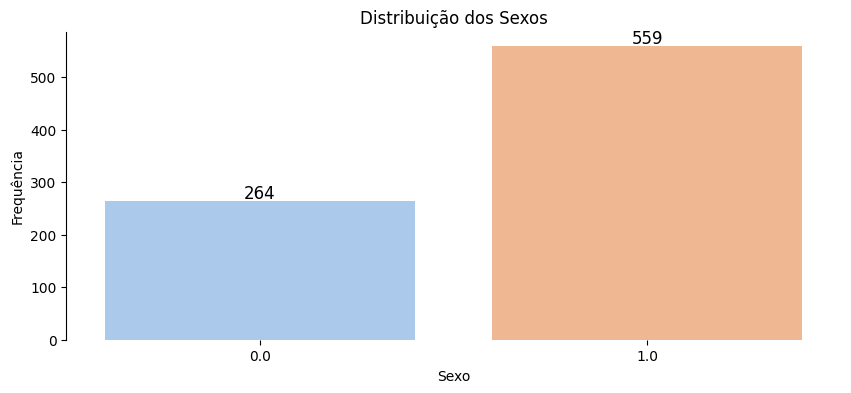

In [233]:
fig = plt.figure(figsize=(10,4))

# Countplot já conta automaticamente os valores de cada categoria
ax = sns.countplot(x='Sex', data=df_titanic_alterado, palette='pastel')

# Ajustes visuais
ax.set(
    title="Distribuição dos Sexos",
    xlabel="Sexo",
    ylabel="Frequência"
)

# Adicionar rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{int(height)}', ha="center", fontsize=12)

# Estilo dos eixos
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color("black")

plt.show()


>#### Criando uma nova coluna para imputar os valores `NaN` de `Sex` pela ***moda***:

In [234]:
moda_value = df_titanic_alterado['Sex'].mode()[0]


In [235]:
df_titanic_alterado['Sex_mode'] = df_titanic_alterado['Sex'].fillna(moda_value)

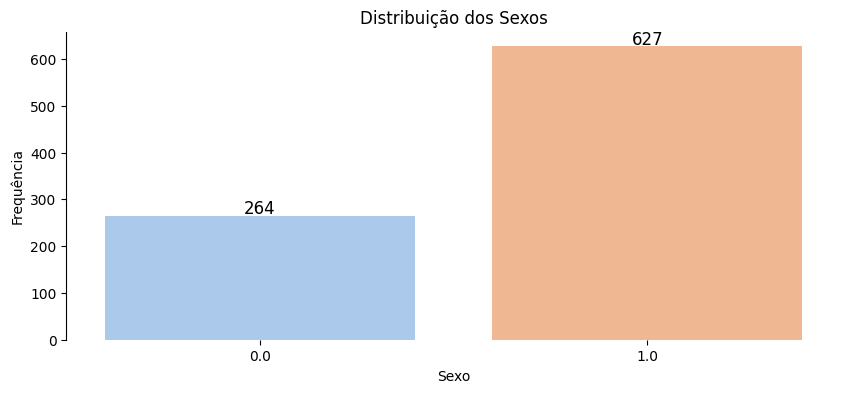

In [236]:
### Visualizando:

fig = plt.figure(figsize=(10,4))

# Countplot já conta automaticamente os valores de cada categoria
ax = sns.countplot(x='Sex_mode', data=df_titanic_alterado, palette='pastel')

# Ajustes visuais
ax.set(
    title="Distribuição dos Sexos",
    xlabel="Sexo",
    ylabel="Frequência"
)

# Adicionar rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{int(height)}', ha="center", fontsize=12)

# Estilo dos eixos
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color("black")

plt.show()

In [237]:
df_titanic_alterado

Survived  Pclass  Sex  SibSp  Parch     Fare Embarked   age  \
0           0     3.0  1.0      1      0   7.2500        S  22.0   
1           1     1.0  0.0      1      0  71.2833        C  38.0   
2           1     3.0  0.0      0      0   7.9250        S  26.0   
3           1     1.0  0.0      1      0  53.1000        S  35.0   
4           0     3.0  1.0      0      0   8.0500        S  35.0   
..        ...     ...  ...    ...    ...      ...      ...   ...   
886         0     2.0  1.0      0      0  13.0000        S  27.0   
887         1     1.0  0.0      0      0  30.0000        S  19.0   
888         0     3.0  0.0      1      2  23.4500        S   NaN   
889         1     1.0  1.0      0      0  30.0000        C  26.0   
890         0     3.0  1.0      0      0   7.7500        Q  32.0   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  FamilySize  \
0             0.0         0.0       1.0        0.0         0.0           2   
1             0.0         0.0       0.0        1.0         0.0           2   
2             0.0         1.0       0.0        0.0         0.0           1   
3             0.0         0.0       0.0        1.0         0.0           2   
4             0.0         0.0       1.0        0.0         0.0           1   
..            ...         ...       ...        ...         ...         ...   
886           0.0         0.0       0.0        0.0         1.0           1   
887           0.0         1.0       0.0        0.0         0.0           1   
888           0.0         1.0       0.0        0.0         0.0           4   
889           0.0         0.0       1.0        0.0         0.0           1   
890           0.0         0.0       1.0        0.0         0.0           1   

     HasCabin  Sex_mode  
0           0       1.0  
1           1       0.0  
2           0       0.0  
3           1       0.0  
4           0       1.0  
..        ...       ...  
886         0       1.0  
887         1       0.0  
888         0       0.0  
889         1       1.0  
890         0       1.0  

[891 rows x 16 columns]

- #### Agora, usando o KNNImputer para imputar os valores faltantes da coluna `Sex` pelo algoritmo, criando uma nova coluna:

In [238]:
from sklearn.impute import KNNImputer

knn_features = df_titanic_alterado[['Sex','age','Fare','Pclass']]

imputer = KNNImputer(n_neighbors=5)
knn_imputed = imputer.fit_transform(knn_features)

df_titanic_alterado['Sex_knn'] = np.round(knn_imputed[:,0]).astype(int)


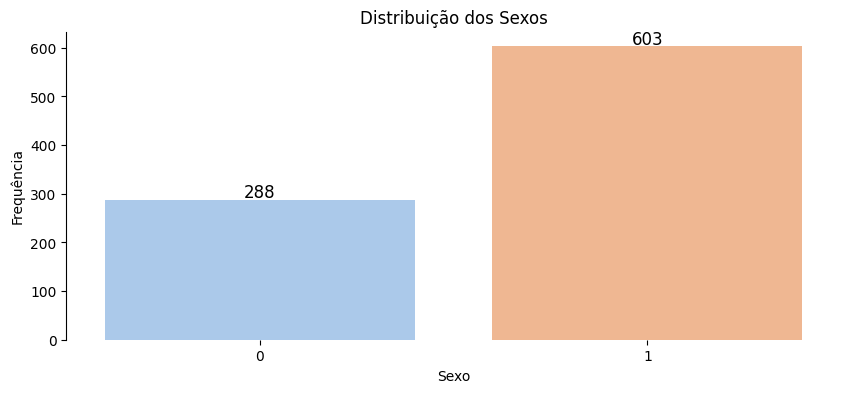

In [239]:
fig = plt.figure(figsize=(10,4))

# Countplot já conta automaticamente os valores de cada categoria
ax = sns.countplot(x='Sex_knn', data=df_titanic_alterado, palette='pastel')

# Ajustes visuais
ax.set(
    title="Distribuição dos Sexos",
    xlabel="Sexo",
    ylabel="Frequência"
)

# Adicionar rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{int(height)}', ha="center", fontsize=12)

# Estilo dos eixos
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color("black")

plt.show()

Dessa forma, podemos concluir que:
- Imputação pelo KNN --> usou informações de outras variáveis (Age, Fare, Pclass, etc.) para “adivinhar” o sexo mais provável de cada passageiro ausente.
- Como resultado, alguns ausentes foram imputados como feminino (0), o que preserva a desigualdade natural (mais homens que mulheres), mas sem distorcer tanto a distribuição.
- Sendo portanto, muito efetivo, uma vez que o KNN conseguiu respeitar o padrão global (mais homens) e ao mesmo tempo corrigir casos específicos que tinham maior chance de serem mulheres.


#### > Como os gráficos apresentaram, os valores de distribuição entre sexos mais consistentes vieram do algoritmo de imputação: ***KNN_imputer***, irei excluir a coluna transformada em binária: `Sex` & a coluna que imputei os valores pela moda: ? `Sex_mode`:

In [240]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        823 non-null    float64
 2   Sex           823 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Embarked      891 non-null    object 
 7   age           714 non-null    float64
 8   Title_Master  891 non-null    float64
 9   Title_Miss    891 non-null    float64
 10  Title_Mr      891 non-null    float64
 11  Title_Mrs     891 non-null    float64
 12  Title_Rare    891 non-null    float64
 13  FamilySize    891 non-null    int64  
 14  HasCabin      891 non-null    int64  
 15  Sex_mode      891 non-null    float64
 16  Sex_knn       891 non-null    int64  
dtypes: float64(10), int64(6), object(1)
memory usage: 157.6+ KB


In [241]:
df_titanic_alterado.drop(columns=['Sex', 'Sex_mode'], inplace=True)

- #### Imputando os valores faltantes para a coluna `Age`:

> Calculando as estatísticas Básicas para a coluna `Age` e visualizando em um Boxplot as informações desta coluna:

In [242]:
### Média de idade dos passageiros no Titanic:
round(df_titanic_alterado['age'].mean(),2)

np.float64(29.69)

In [243]:
###Mediana de idades dos passageiros do Titanic:
round(df_titanic_alterado['age'].median(),2)

np.float64(28.0)

- Limite superior, limite inferior e Quartis para essas coluna:

In [244]:
### 0.25, Mediana, 0.75 e 0.99/Primeiro, segundo, Terceiro e 99% dos dados, Limite superior, limite inferior e outliers:

Q1 = df_titanic_alterado['age'].quantile(0.25)
Q2 = df_titanic_alterado['age'].quantile(0.50)
IQR = Q3 - Q1

#Limite Inferior e superior:

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#Outliers:
outliers = df_titanic_alterado[(df_titanic_alterado["age"] < limite_inferior) | (df_titanic_alterado["age"] > limite_superior)]
print("Q1:", Q1, "Q3: ", Q3, "IQR:", IQR)
print("\nOutliers destectados pelo IQR:\n", outliers)



Q1: 20.0 Q3:  38.0 IQR: 18.0

Outliers destectados pelo IQR:
      Survived  Pclass  SibSp  Parch     Fare Embarked   age  Title_Master  \
33          0     2.0      0      0  10.5000        S  66.0           0.0   
96          0     1.0      0      0  34.6542        C  71.0           0.0   
116         0     3.0      0      0   7.7500        Q  70.0           0.0   
493         0     1.0      0      0  49.5042        C  71.0           0.0   
630         1     1.0      0      0  30.0000        S  80.0           0.0   
672         0     2.0      0      0  10.5000        S  70.0           0.0   
745         0     1.0      1      1  71.0000        S  70.0           0.0   
851         0     3.0      0      0   7.7750        S  74.0           0.0   

     Title_Miss  Title_Mr  Title_Mrs  Title_Rare  FamilySize  HasCabin  \
33          0.0       1.0        0.0         0.0           1         0   
96          0.0       1.0        0.0         0.0           1         1   
116         0.0       

In [245]:
outliers

Survived  Pclass  SibSp  Parch     Fare Embarked   age  Title_Master  \
33          0     2.0      0      0  10.5000        S  66.0           0.0   
96          0     1.0      0      0  34.6542        C  71.0           0.0   
116         0     3.0      0      0   7.7500        Q  70.0           0.0   
493         0     1.0      0      0  49.5042        C  71.0           0.0   
630         1     1.0      0      0  30.0000        S  80.0           0.0   
672         0     2.0      0      0  10.5000        S  70.0           0.0   
745         0     1.0      1      1  71.0000        S  70.0           0.0   
851         0     3.0      0      0   7.7750        S  74.0           0.0   

     Title_Miss  Title_Mr  Title_Mrs  Title_Rare  FamilySize  HasCabin  \
33          0.0       1.0        0.0         0.0           1         0   
96          0.0       1.0        0.0         0.0           1         1   
116         0.0       1.0        0.0         0.0           1         0   
493         0.0       1.0        0.0         0.0           1         0   
630         0.0       1.0        0.0         0.0           1         1   
672         0.0       1.0        0.0         0.0           1         0   
745         0.0       0.0        0.0         1.0           3         1   
851         0.0       1.0        0.0         0.0           1         0   

     Sex_knn  
33         1  
96         1  
116        1  
493        1  
630        1  
672        1  
745        1  
851        1

> Os valores de idade encontrados não expressão outliers!

In [246]:
import plotly.express as px
import nbformat as nb
import seaborn as sns

In [247]:

grafico_box_plot = px.box(df_titanic_alterado, y = 'age')
grafico_box_plot.show()

> Visualizanda uma interação entre as variáveis por uma matriz de correlação para utilizar o método knn_imputer afim de se preencher os valores ausentes dessa coluna

In [248]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        823 non-null    float64
 2   SibSp         891 non-null    int64  
 3   Parch         891 non-null    int64  
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    object 
 6   age           714 non-null    float64
 7   Title_Master  891 non-null    float64
 8   Title_Miss    891 non-null    float64
 9   Title_Mr      891 non-null    float64
 10  Title_Mrs     891 non-null    float64
 11  Title_Rare    891 non-null    float64
 12  FamilySize    891 non-null    int64  
 13  HasCabin      891 non-null    int64  
 14  Sex_knn       891 non-null    int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 143.7+ KB


In [249]:
#### Selecionando apenas colunas numéricas para plotar uma matriz de correlação:

df_num = df_titanic_alterado.select_dtypes(include=['int64','int32', 'float64'])

#Calcular a correlação:

corr=df_num.corr()

In [250]:
fig = px.imshow(corr,text_auto=True, color_continuous_scale='RdBu_r', aspect="auto", title="Matriz de Correlação interativa das Variávies Numéricas")
fig.show()

> #### De acordo com a matriz de correlação plotada, as features ideais para se selecionar, e imputar no método do algoritmo Knn_imputer para dados ausentes, da mesma forma que realizei para a coluna sexo, é:

In [251]:
knn_features_age = df_titanic_alterado[['age', 'Pclass', 'Fare', 'Sex_knn', 'Title_Mr', 'Title_Miss', 'Title_Mrs', 'Title_Master', 'FamilySize']]

In [252]:
imputer = KNNImputer(n_neighbors=5)
knn_imputed_age = imputer.fit_transform(knn_features_age)
df_titanic_alterado['age_knn_imputer'] = knn_imputed_age[:, 0]


#### > Comparando as duas colunas(com valores imputados e sem valores imputados) para verificar a robustez do algortimo hot-deck, knn_imputer, nesta variável:

In [253]:
import plotly.graph_objects as go


In [254]:
fig = go.Figure()

#Boxplot da idade original (com NaN ignorados)

fig.add_trace(go.Box(
    y=df_titanic_alterado['age'],
    name= 'Idade Original (com NaN ignorados)',
    marker_color = 'indianred'
)
)

# Boxplot da idade imputada pelo Knn:
fig.add_trace(go.Box(
    y=df_titanic_alterado['age_knn_imputer'],
    name= 'Idade Imputada pelo Knn',
    marker_color = 'lightseagreen'
)
)

fig.update_layout(
    title="Distribuição da Idade: Original vs Imputada pelo Knn",
    yaxis_title="Idade",
    boxmode = 'group' # Agrupa os boxplots lado a lado
)
fig.show()


#### > ***Dessa forma, consigo concluir que o método (hot-deck) knn_imputer, imputou os valores ausentes de forma eficiente, conforme mostra o gráfico de boxplot***:

In [255]:
### Excluindio a coluna age original:

df_titanic_alterado.drop(columns=['age'], inplace=True)

In [256]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           823 non-null    float64
 2   SibSp            891 non-null    int64  
 3   Parch            891 non-null    int64  
 4   Fare             891 non-null    float64
 5   Embarked         891 non-null    object 
 6   Title_Master     891 non-null    float64
 7   Title_Miss       891 non-null    float64
 8   Title_Mr         891 non-null    float64
 9   Title_Mrs        891 non-null    float64
 10  Title_Rare       891 non-null    float64
 11  FamilySize       891 non-null    int64  
 12  HasCabin         891 non-null    int64  
 13  Sex_knn          891 non-null    int64  
 14  age_knn_imputer  891 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 143.7+ KB


> #### Agora, irei imputar os valores ausentes para a variável `Pclass`, a última com valores que faltantes deste Dataset

- Verificando a distribuição da variável em um gráfico de Histograma:

In [257]:
fig = px.histogram(df_titanic_alterado, x='Pclass', title='Distribuição da variável Pclass')
fig.show()

> Com base na matriz de correlação plotada anteriormente, a viriável 'Pclass', apresentam forte  correlações, negativas, para com as variáveis:

In [258]:
knn_features_pclass = df_titanic_alterado[['Pclass','Fare', 'age_knn_imputer', 'HasCabin','Survived']]


In [259]:
imputer = KNNImputer(n_neighbors=5)
knn_imputed_pclass = imputer.fit_transform(knn_features_pclass)
df_titanic_alterado['pclass_knn_imputer'] = np.round(knn_imputed_pclass[:, 0]).astype(int)

In [260]:
df_titanic_alterado

Survived  Pclass  SibSp  Parch     Fare Embarked  Title_Master  \
0           0     3.0      1      0   7.2500        S           0.0   
1           1     1.0      1      0  71.2833        C           0.0   
2           1     3.0      0      0   7.9250        S           0.0   
3           1     1.0      1      0  53.1000        S           0.0   
4           0     3.0      0      0   8.0500        S           0.0   
..        ...     ...    ...    ...      ...      ...           ...   
886         0     2.0      0      0  13.0000        S           0.0   
887         1     1.0      0      0  30.0000        S           0.0   
888         0     3.0      1      2  23.4500        S           0.0   
889         1     1.0      0      0  30.0000        C           0.0   
890         0     3.0      0      0   7.7500        Q           0.0   

     Title_Miss  Title_Mr  Title_Mrs  Title_Rare  FamilySize  HasCabin  \
0           0.0       1.0        0.0         0.0           2         0   
1           0.0       0.0        1.0         0.0           2         1   
2           1.0       0.0        0.0         0.0           1         0   
3           0.0       0.0        1.0         0.0           2         1   
4           0.0       1.0        0.0         0.0           1         0   
..          ...       ...        ...         ...         ...       ...   
886         0.0       0.0        0.0         1.0           1         0   
887         1.0       0.0        0.0         0.0           1         1   
888         1.0       0.0        0.0         0.0           4         0   
889         0.0       1.0        0.0         0.0           1         1   
890         0.0       1.0        0.0         0.0           1         0   

     Sex_knn  age_knn_imputer  pclass_knn_imputer  
0          1             22.0                   3  
1          0             38.0                   1  
2          0             26.0                   3  
3          0             35.0                   1  
4          1             35.0                   3  
..       ...              ...                 ...  
886        1             27.0                   2  
887        0             19.0                   1  
888        0             20.4                   3  
889        1             26.0                   1  
890        1             32.0                   3  

[891 rows x 16 columns]

In [261]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              823 non-null    float64
 2   SibSp               891 non-null    int64  
 3   Parch               891 non-null    int64  
 4   Fare                891 non-null    float64
 5   Embarked            891 non-null    object 
 6   Title_Master        891 non-null    float64
 7   Title_Miss          891 non-null    float64
 8   Title_Mr            891 non-null    float64
 9   Title_Mrs           891 non-null    float64
 10  Title_Rare          891 non-null    float64
 11  FamilySize          891 non-null    int64  
 12  HasCabin            891 non-null    int64  
 13  Sex_knn             891 non-null    int64  
 14  age_knn_imputer     891 non-null    float64
 15  pclass_knn_imputer  891 non-null    int64  
dtypes: float64(8)

> #### Excluindo a coluna `Pclass` original, após a imputação dos valores ausentes:

In [262]:
df_titanic_alterado.drop(columns=['Pclass'], inplace=True)

#### 4) Escala dos atributos

Agora, será necessário reescalar os dados, para que os algoritmos consigam aprender as relações entre os dados sem muito ruído e melhorar a classificação.

Obs: Para realizar essa etapa, é necessário verificar e tratar colunas com outliers.

- TODO
- 1) Verificar quais dados possuem outliers e tratar de acordo
- 2) Reescalar os dados

#### 1-) Verificando os dados outliers para a coluna: `Fare`:

In [263]:
grafico_box_plot = px.box(df_titanic_alterado, y = 'Fare', title='Boxplot da variável Fare')
grafico_box_plot.show()

In [264]:
### 0.25, Mediana, 0.75 e 0.99/Primeiro, segundo, Terceiro e 99% dos dados, Limite superior, limite inferior e outliers:

Q1_Fare = df_titanic_alterado['Fare'].quantile(0.25)
Q3_Fare = df_titanic_alterado['Fare'].quantile(0.50)
IQR_Fare = Q3_Fare - Q1_Fare

#Limite Inferior e superior:

limite_inferior_fare = Q1_Fare - 1.5 * IQR_Fare
limite_superior_fare = Q3_Fare + 1.5 * IQR_Fare

#Outliers:
outliers_fare = df_titanic_alterado[(df_titanic_alterado["Fare"] < limite_inferior_fare) | (df_titanic_alterado["Fare"] > limite_superior_fare)]
print("Q1:", Q1_Fare, "Q3: ", Q3_Fare, "IQR:", IQR_Fare)
print("\nOutliers destectados pelo IQR:\n", outliers_fare)

Q1: 7.9104 Q3:  14.4542 IQR: 6.5438

Outliers destectados pelo IQR:
      Survived  SibSp  Parch     Fare Embarked  Title_Master  Title_Miss  \
1           1      1      0  71.2833        C           0.0         0.0   
3           1      1      0  53.1000        S           0.0         0.0   
6           0      0      0  51.8625        S           0.0         0.0   
9           1      1      0  30.0708        C           0.0         0.0   
11          1      0      0  26.5500        S           0.0         1.0   
..        ...    ...    ...      ...      ...           ...         ...   
879         1      0      1  83.1583        C           0.0         0.0   
880         1      0      1  26.0000        S           0.0         0.0   
885         0      0      5  29.1250        Q           0.0         0.0   
887         1      0      0  30.0000        S           0.0         1.0   
889         1      0      0  30.0000        C           0.0         0.0   

     Title_Mr  Title_Mrs  Titl

In [265]:
df_titanic_alterado.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [266]:
df_titanic_alterado['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

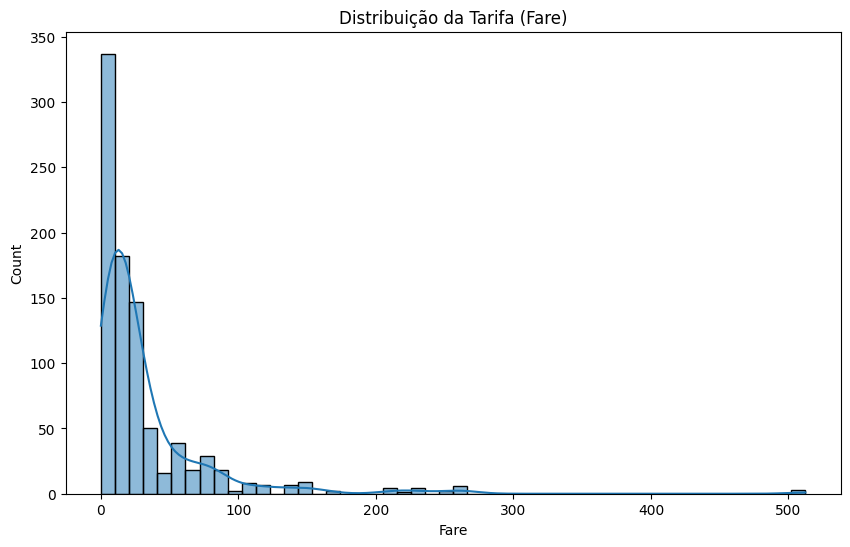

In [267]:

plt.figure(figsize=(10,6))
sns.histplot(df_titanic_alterado['Fare'], bins=50, kde=True)
plt.title("Distribuição da Tarifa (Fare)")
plt.show()


> ***Interpretando esses valores no contexto do Titanic:*** os valores mais altos representam classes mais altas;

- O boxplot sinaliza como “outliers” porque a distribuição de Fare é fortemente assimétrica (a maioria pagou pouco, poucos pagaram muito).
- Portanto, estatisticamente são outliers, mas do ponto de vista de negócio são legítimos.Por exemplo, os valors como 512.3292 são legítimos, estatisticamente são outliers, mas no contexto histórico representam tarifas reais da  1a classe. Dessa forma, a decisão seria manter, e aplicar transformações para reduzir/minimar o impacto nos modelos;


> Dessa forma, dado algum conhecimento de alguns métodos de normalização de dados, pensei em utilizar o método da biblioteca sklearn.preprocessing chamado RobustScaler, que é um método de normalização robusto a outliers, ou seja, ele utiliza os quartis para realizar a normalização dos dados, minimizando o impacto dos outliers na transformação dos dados.

- Essa técnica é uma variação da normalização min-max, mas utiliza estatísticas robustas para lidar com
outliers. Em vez de utilizar os valores mínimo e máximo, ela utiliza os percentis, como o 25º e o 75º
percentis, para determinar a escala. Essa técnica é útil quando os dados possuem outliers significativos e
desejamos minimizar seu impacto na normalização.

In [268]:
from sklearn.preprocessing import RobustScaler

In [269]:
# Selecionando apenas a coluna Fare

fare_data = df_titanic_alterado[['Fare']]

#Criando o o objeto  RobustScaler

scaler = RobustScaler()

#Ajustar e transformar os dados de Fare

fare_scaled = scaler.fit_transform(fare_data)

#Criando uma nova colunas com os dados escalados para visualizar um comparação entre ambas as colunas, antes e depois de passar pela transformação:

df_titanic_alterado['fare_robust_scaled'] = fare_scaled

In [270]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   SibSp               891 non-null    int64  
 2   Parch               891 non-null    int64  
 3   Fare                891 non-null    float64
 4   Embarked            891 non-null    object 
 5   Title_Master        891 non-null    float64
 6   Title_Miss          891 non-null    float64
 7   Title_Mr            891 non-null    float64
 8   Title_Mrs           891 non-null    float64
 9   Title_Rare          891 non-null    float64
 10  FamilySize          891 non-null    int64  
 11  HasCabin            891 non-null    int64  
 12  Sex_knn             891 non-null    int64  
 13  age_knn_imputer     891 non-null    float64
 14  pclass_knn_imputer  891 non-null    int64  
 15  fare_robust_scaled  891 non-null    float64
dtypes: float64(8)

> Por fim, tratando a última coluna em formato numérico que faltou no dataset, a coluna `Embarked`

In [271]:
df_titanic_alterado.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [272]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
#Ajustando a transformação:

title_encoded = encoder.fit_transform(df_titanic_alterado[["Embarked"]])
#Criar Datadrem com os nomes das novas colunas:

title_encoded_df = pd.DataFrame(title_encoded, columns=encoder.get_feature_names_out(["Embarked"]))

#Concatetando com a base original:

df_titanic_alterado = pd.concat([df_titanic_alterado, title_encoded_df], axis=1)

In [273]:
df_titanic_alterado

Survived  SibSp  Parch     Fare Embarked  Title_Master  Title_Miss  \
0           0      1      0   7.2500        S           0.0         0.0   
1           1      1      0  71.2833        C           0.0         0.0   
2           1      0      0   7.9250        S           0.0         1.0   
3           1      1      0  53.1000        S           0.0         0.0   
4           0      0      0   8.0500        S           0.0         0.0   
..        ...    ...    ...      ...      ...           ...         ...   
886         0      0      0  13.0000        S           0.0         0.0   
887         1      0      0  30.0000        S           0.0         1.0   
888         0      1      2  23.4500        S           0.0         1.0   
889         1      0      0  30.0000        C           0.0         0.0   
890         0      0      0   7.7500        Q           0.0         0.0   

     Title_Mr  Title_Mrs  Title_Rare  FamilySize  HasCabin  Sex_knn  \
0         1.0        0.0         0.0           2         0        1   
1         0.0        1.0         0.0           2         1        0   
2         0.0        0.0         0.0           1         0        0   
3         0.0        1.0         0.0           2         1        0   
4         1.0        0.0         0.0           1         0        1   
..        ...        ...         ...         ...       ...      ...   
886       0.0        0.0         1.0           1         0        1   
887       0.0        0.0         0.0           1         1        0   
888       0.0        0.0         0.0           4         0        0   
889       1.0        0.0         0.0           1         1        1   
890       1.0        0.0         0.0           1         0        1   

     age_knn_imputer  pclass_knn_imputer  fare_robust_scaled  Embarked_C  \
0               22.0                   3           -0.312011         0.0   
1               38.0                   1            2.461242         1.0   
2               26.0                   3           -0.282777         0.0   
3               35.0                   1            1.673732         0.0   
4               35.0                   3           -0.277363         0.0   
..               ...                 ...                 ...         ...   
886             27.0                   2           -0.062981         0.0   
887             19.0                   1            0.673281         0.0   
888             20.4                   3            0.389604         0.0   
889             26.0                   1            0.673281         1.0   
890             32.0                   3           -0.290356         0.0   

     Embarked_Q  Embarked_S  
0           0.0         1.0  
1           0.0         0.0  
2           0.0         1.0  
3           0.0         1.0  
4           0.0         1.0  
..          ...         ...  
886         0.0         1.0  
887         0.0         1.0  
888         0.0         1.0  
889         0.0         0.0  
890         1.0         0.0  

[891 rows x 19 columns]

> Excluindo a coluna `Embarked` && `Fare` (após a escalação de valores):

In [274]:
df_titanic_alterado.drop(columns=['Embarked', 'Fare'], inplace=True)


In [275]:
df_titanic_alterado

Survived  SibSp  Parch  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0           0      1      0           0.0         0.0       1.0        0.0   
1           1      1      0           0.0         0.0       0.0        1.0   
2           1      0      0           0.0         1.0       0.0        0.0   
3           1      1      0           0.0         0.0       0.0        1.0   
4           0      0      0           0.0         0.0       1.0        0.0   
..        ...    ...    ...           ...         ...       ...        ...   
886         0      0      0           0.0         0.0       0.0        0.0   
887         1      0      0           0.0         1.0       0.0        0.0   
888         0      1      2           0.0         1.0       0.0        0.0   
889         1      0      0           0.0         0.0       1.0        0.0   
890         0      0      0           0.0         0.0       1.0        0.0   

     Title_Rare  FamilySize  HasCabin  Sex_knn  age_knn_imputer  \
0           0.0           2         0        1             22.0   
1           0.0           2         1        0             38.0   
2           0.0           1         0        0             26.0   
3           0.0           2         1        0             35.0   
4           0.0           1         0        1             35.0   
..          ...         ...       ...      ...              ...   
886         1.0           1         0        1             27.0   
887         0.0           1         1        0             19.0   
888         0.0           4         0        0             20.4   
889         0.0           1         1        1             26.0   
890         0.0           1         0        1             32.0   

     pclass_knn_imputer  fare_robust_scaled  Embarked_C  Embarked_Q  \
0                     3           -0.312011         0.0         0.0   
1                     1            2.461242         1.0         0.0   
2                     3           -0.282777         0.0         0.0   
3                     1            1.673732         0.0         0.0   
4                     3           -0.277363         0.0         0.0   
..                  ...                 ...         ...         ...   
886                   2           -0.062981         0.0         0.0   
887                   1            0.673281         0.0         0.0   
888                   3            0.389604         0.0         0.0   
889                   1            0.673281         1.0         0.0   
890                   3           -0.290356         0.0         1.0   

     Embarked_S  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           1.0  
..          ...  
886         1.0  
887         1.0  
888         1.0  
889         0.0  
890         0.0  

[891 rows x 17 columns]

In [276]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   SibSp               891 non-null    int64  
 2   Parch               891 non-null    int64  
 3   Title_Master        891 non-null    float64
 4   Title_Miss          891 non-null    float64
 5   Title_Mr            891 non-null    float64
 6   Title_Mrs           891 non-null    float64
 7   Title_Rare          891 non-null    float64
 8   FamilySize          891 non-null    int64  
 9   HasCabin            891 non-null    int64  
 10  Sex_knn             891 non-null    int64  
 11  age_knn_imputer     891 non-null    float64
 12  pclass_knn_imputer  891 non-null    int64  
 13  fare_robust_scaled  891 non-null    float64
 14  Embarked_C          891 non-null    float64
 15  Embarked_Q          891 non-null    float64
 16  Embarked_S   

#### > ***Reescala dos valores numéricos restantes!***:

In [277]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [278]:
# Cria dataset com apenas as colunas selecionadas, conforme no ipynb de exemplo:

reduced_df = df_titanic_alterado[['Parch', 'FamilySize', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare','HasCabin', 'Sex_knn', 'age_knn_imputer', 'pclass_knn_imputer', 'Survived']]
reduced_df.head()

Parch  FamilySize  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0      0           2           0.0         0.0       1.0        0.0   
1      0           2           0.0         0.0       0.0        1.0   
2      0           1           0.0         1.0       0.0        0.0   
3      0           2           0.0         0.0       0.0        1.0   
4      0           1           0.0         0.0       1.0        0.0   

   Title_Rare  HasCabin  Sex_knn  age_knn_imputer  pclass_knn_imputer  \
0         0.0         0        1             22.0                   3   
1         0.0         1        0             38.0                   1   
2         0.0         0        0             26.0                   3   
3         0.0         1        0             35.0                   1   
4         0.0         0        1             35.0                   3   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [279]:
num_cols = ['Parch', 'FamilySize', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare','HasCabin', 'Sex_knn', 'age_knn_imputer', 'pclass_knn_imputer']

In [280]:
transformer = ColumnTransformer([
    ('Standard',  StandardScaler(), num_cols)
])


scaled_values = transformer.fit_transform(reduced_df)

# Criar novo DataFrame com os dados transformados
formatted_df = pd.DataFrame(scaled_values, columns=num_cols)
formatted_df['Survived'] = df_titanic_alterado['Survived']

formatted_df.head()

Parch  FamilySize  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0 -0.473674    0.059160     -0.216803   -0.506655  0.850532  -0.403962   
1 -0.473674    0.059160     -0.216803   -0.506655 -1.175735   2.475480   
2 -0.473674   -0.560975     -0.216803    1.973729 -1.175735  -0.403962   
3 -0.473674    0.059160     -0.216803   -0.506655 -1.175735   2.475480   
4 -0.473674   -0.560975     -0.216803   -0.506655  0.850532  -0.403962   

   Title_Rare  HasCabin   Sex_knn  age_knn_imputer  pclass_knn_imputer  \
0   -0.176777 -0.544925  0.691095        -0.583748            0.821795   
1   -0.176777  1.835115 -1.446980         0.592693           -1.578924   
2   -0.176777 -0.544925 -1.446980        -0.289637            0.821795   
3   -0.176777  1.835115 -1.446980         0.372110           -1.578924   
4   -0.176777 -0.544925  0.691095         0.372110            0.821795   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [281]:
final_df = pd.DataFrame(formatted_df)

In [282]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Parch               891 non-null    float64
 1   FamilySize          891 non-null    float64
 2   Title_Master        891 non-null    float64
 3   Title_Miss          891 non-null    float64
 4   Title_Mr            891 non-null    float64
 5   Title_Mrs           891 non-null    float64
 6   Title_Rare          891 non-null    float64
 7   HasCabin            891 non-null    float64
 8   Sex_knn             891 non-null    float64
 9   age_knn_imputer     891 non-null    float64
 10  pclass_knn_imputer  891 non-null    float64
 11  Survived            891 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 83.7 KB


In [283]:
X = final_df[['Parch', 'FamilySize', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'HasCabin', 'Sex_knn', 'age_knn_imputer', 'pclass_knn_imputer']]
Y = final_df['Survived']

print(X.head())
print(Y.head())

      Parch  FamilySize  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0 -0.473674    0.059160     -0.216803   -0.506655  0.850532  -0.403962   
1 -0.473674    0.059160     -0.216803   -0.506655 -1.175735   2.475480   
2 -0.473674   -0.560975     -0.216803    1.973729 -1.175735  -0.403962   
3 -0.473674    0.059160     -0.216803   -0.506655 -1.175735   2.475480   
4 -0.473674   -0.560975     -0.216803   -0.506655  0.850532  -0.403962   

   Title_Rare  HasCabin   Sex_knn  age_knn_imputer  pclass_knn_imputer  
0   -0.176777 -0.544925  0.691095        -0.583748            0.821795  
1   -0.176777  1.835115 -1.446980         0.592693           -1.578924  
2   -0.176777 -0.544925 -1.446980        -0.289637            0.821795  
3   -0.176777  1.835115 -1.446980         0.372110           -1.578924  
4   -0.176777 -0.544925  0.691095         0.372110            0.821795  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


#### 2-) Aplicando/*Rascunhando* os primeiros Algoritmos, já visualizando  métricas de acerto e taxa de aprendizado::

In [284]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.base import clone


In [285]:
# Rotina para executar um algoritmo e coletar os resultados usando Cross-validation (k=5)
def apply_algorithm(X, Y, algorithm, k=5, average='macro'):

  results = {
      'accuracy': [],
      'precision': [],
      'recall': [],
      'f1': []
  }

  k_folds = StratifiedKFold(n_splits = k)

  for train_index, test_index in k_folds.split(X, Y):
    alg = clone(algorithm)

    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]

    alg.fit(X_train, y_train)

    y_pred = alg.predict(X_test)

    results['accuracy'].append(accuracy_score(y_pred, y_test))
    results['precision'].append(precision_score(y_pred, y_test, average=average))
    results['recall'].append(recall_score(y_pred, y_test, average=average))
    results['f1'].append(f1_score(y_pred, y_test, average=average))

  return results

> Aplicando o algoritmo  MULTILAYER PERCEPTRON/Redes Neurais (MLP)  nas colunas escolhidas, conforme um script de exemplo e verificando o resultado:
 
 Para valisar os resultados, está sendo utilizando a técnicas de Cross-Validation com 5 partições:

 

In [286]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

In [287]:
# Cria modelo de aprendizado
#alg_knn = KNeighborsClassifier(n_neighbors=3)

alg_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(20, 20), random_state=42)

k = 5

# Aplica e captura métricas de avaliação
results = apply_algorithm(X, Y, alg_nn, k)

# Exibe resultados
print("Accuracy: ", np.array(results['accuracy'], dtype=float).mean())
print("Precision: ", np.array(results['precision'], dtype=float).mean())
print("Recall: ", np.array(results['recall'], dtype=float).mean())
print("F1-Score: ", np.array(results['f1'], dtype=float).mean())

Accuracy:  0.7969367899064717
Precision:  0.7795050116358688
Recall:  0.7876945504925692
F1-Score:  0.7820197131347157


> Não obtive nenhum resultado para as métricas de validação acima de 90%, de acordo com  as colunas selecionadas anteriormente: 
 - ('reduced_df = df_titanic_alterado[['Parch', 'FamilySize', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare','HasCabin', 'Sex_knn', 'age_knn_imputer', 'pclass_knn_imputer', 'Survived']])


> Dessa forma, irei executar em todas as colunas para verificação dos resultados

In [288]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   SibSp               891 non-null    int64  
 2   Parch               891 non-null    int64  
 3   Title_Master        891 non-null    float64
 4   Title_Miss          891 non-null    float64
 5   Title_Mr            891 non-null    float64
 6   Title_Mrs           891 non-null    float64
 7   Title_Rare          891 non-null    float64
 8   FamilySize          891 non-null    int64  
 9   HasCabin            891 non-null    int64  
 10  Sex_knn             891 non-null    int64  
 11  age_knn_imputer     891 non-null    float64
 12  pclass_knn_imputer  891 non-null    int64  
 13  fare_robust_scaled  891 non-null    float64
 14  Embarked_C          891 non-null    float64
 15  Embarked_Q          891 non-null    float64
 16  Embarked_S   

In [289]:
num_cols = df_titanic_alterado.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()

In [290]:

# Escala valores
transformer = ColumnTransformer([
    ('Nomalization',  StandardScaler(), num_cols)
])

scaled_values = transformer.fit_transform(df_titanic_alterado)

full_dataset = pd.DataFrame(scaled_values, columns=num_cols)
full_X = full_dataset[['SibSp', 'Parch', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'HasCabin', 'FamilySize', 'Sex_knn', 'age_knn_imputer', 'pclass_knn_imputer', 'fare_robust_scaled', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Cria modelo de aprendizado

nn = MLPClassifier(solver='adam', hidden_layer_sizes=(20,20), max_iter=1000, random_state=1)

# Aplica e captura métricas de avaliação
results = apply_algorithm(full_X, Y, nn)

# Exibe resultados
print("Accuracy: ", np.array(results['accuracy'], dtype=float).mean())
print("Precision: ", np.array(results['precision'], dtype=float).mean())
print("Recall: ", np.array(results['recall'], dtype=float).mean())
print("F1-Score: ", np.array(results['f1'], dtype=float).mean())

Accuracy:  0.8080848659845585
Precision:  0.7851843110236081
Recall:  0.8039916262742436
F1-Score:  0.7913133248838332


#### **Check-List**


- Remoção das colunas que não acrescentam informações úteis;
- Todas as colunas estão com a sua representação unificada;
- Todas as colunas estão no formato numérico;
- Todas as colunas estão com dados válidos (sem dados falantes);
- Todas as colunas estão reescaladas;


---


#### <a href="#Introdução a fase de utilização dos Modelos">Modelos</a> 

### > **Aplicação e validação de algoritmos de Machine Learning**


- Nesta fase, o objetivo é usar os dados preparados na fase anterior para construir um classificador binário. 


- Experimentando ao menos 4 dos algoritmos para classificação. Dentre esses 4 algoritmos de aprendizado, estão incluídos: **Árvores de Decisão** e **MultiLayer Perceptron**. 
- Exploração  dos hiperparâmetros dos algoritmos visando a obtenção de melhores resultados.

-***1)*** **Escolha dos algoritmos e exploração dos hiper-parâmetros**


Escolha de 2 algoritmos de classificação, junto com Árvore de decisão e MLP, e o conjunto de hiper parâmetros que será explorado

In [291]:
# Insira seu código aqui.
# Você pode criar células de código adicionais

# TODO
# 1) Criação dos modelos Árvore de decisão, MLP e mais dois algoritmos de sua escolha


In [292]:
df_titanic_alterado.head(5)

Survived  SibSp  Parch  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0         0      1      0           0.0         0.0       1.0        0.0   
1         1      1      0           0.0         0.0       0.0        1.0   
2         1      0      0           0.0         1.0       0.0        0.0   
3         1      1      0           0.0         0.0       0.0        1.0   
4         0      0      0           0.0         0.0       1.0        0.0   

   Title_Rare  FamilySize  HasCabin  Sex_knn  age_knn_imputer  \
0         0.0           2         0        1             22.0   
1         0.0           2         1        0             38.0   
2         0.0           1         0        0             26.0   
3         0.0           2         1        0             35.0   
4         0.0           1         0        1             35.0   

   pclass_knn_imputer  fare_robust_scaled  Embarked_C  Embarked_Q  Embarked_S  
0                   3           -0.312011         0.0         0.0         1.0  
1                   1            2.461242         1.0         0.0         0.0  
2                   3           -0.282777         0.0         0.0         1.0  
3                   1            1.673732         0.0         0.0         1.0  
4                   3           -0.277363         0.0         0.0         1.0

#### > Realizando o Pré Processamento de Todas as Colunas antes de dividir o conjunto de dados em: Treino e Teste, conforme visto nas aulas

In [293]:
df_titanic_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   SibSp               891 non-null    int64  
 2   Parch               891 non-null    int64  
 3   Title_Master        891 non-null    float64
 4   Title_Miss          891 non-null    float64
 5   Title_Mr            891 non-null    float64
 6   Title_Mrs           891 non-null    float64
 7   Title_Rare          891 non-null    float64
 8   FamilySize          891 non-null    int64  
 9   HasCabin            891 non-null    int64  
 10  Sex_knn             891 non-null    int64  
 11  age_knn_imputer     891 non-null    float64
 12  pclass_knn_imputer  891 non-null    int64  
 13  fare_robust_scaled  891 non-null    float64
 14  Embarked_C          891 non-null    float64
 15  Embarked_Q          891 non-null    float64
 16  Embarked_S   

- Criando uma cópia do DataFrame já normalizdo para seus tipos de variáveis e tratado, como segurança:

In [294]:
df_titanic_processado = df_titanic_alterado.copy()

In [295]:
df_titanic_processado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   SibSp               891 non-null    int64  
 2   Parch               891 non-null    int64  
 3   Title_Master        891 non-null    float64
 4   Title_Miss          891 non-null    float64
 5   Title_Mr            891 non-null    float64
 6   Title_Mrs           891 non-null    float64
 7   Title_Rare          891 non-null    float64
 8   FamilySize          891 non-null    int64  
 9   HasCabin            891 non-null    int64  
 10  Sex_knn             891 non-null    int64  
 11  age_knn_imputer     891 non-null    float64
 12  pclass_knn_imputer  891 non-null    int64  
 13  fare_robust_scaled  891 non-null    float64
 14  Embarked_C          891 non-null    float64
 15  Embarked_Q          891 non-null    float64
 16  Embarked_S   

> Aplicando o método RobustScaler() em todas as variáveis, exceto a variável ` fare_robust_scaled`, no qual já passou nesse método, além de:

- Não escalar a coluna alvo `Survived` e não escalonar as colunas já binárias/dummies: -(`HasCabin`, `Sex_knn`, `Embarked_C`, `Embarked_Q`, `Embarked_S`, `Title_*`) → já estão em 0/1 e não precisam de transformação.

- Variáveis que serão escalonadas, contínuas/discretas:

- `SibSp`
- `Parch`
- `FamilySize`
- `age_knn_imputer`
- `pclass_knn_imputer`




In [296]:
# Colunas que serão escalonadas:
cols_to_scale = ['SibSp', 'Parch', 'FamilySize', 'age_knn_imputer', 'pclass_knn_imputer']

scaler = RobustScaler()

#Aplicando:

df_titanic_processado[cols_to_scale] = scaler.fit_transform(df_titanic_processado[cols_to_scale])

In [297]:
df_titanic_processado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   SibSp               891 non-null    float64
 2   Parch               891 non-null    float64
 3   Title_Master        891 non-null    float64
 4   Title_Miss          891 non-null    float64
 5   Title_Mr            891 non-null    float64
 6   Title_Mrs           891 non-null    float64
 7   Title_Rare          891 non-null    float64
 8   FamilySize          891 non-null    float64
 9   HasCabin            891 non-null    int64  
 10  Sex_knn             891 non-null    int64  
 11  age_knn_imputer     891 non-null    float64
 12  pclass_knn_imputer  891 non-null    float64
 13  fare_robust_scaled  891 non-null    float64
 14  Embarked_C          891 non-null    float64
 15  Embarked_Q          891 non-null    float64
 16  Embarked_S   

- Dessa forma: 
- A coluna: Alvo (Survived) --> já está binário (0/1), não precisa mexer
- Dummies/OneHot (Embarked_C, Embarked_Q, Embarked_S, Title_*) → já estão em formato numérico 0/1, podem entrar direto nos modelos
- Binárias (HasCabin, Sex_knn) → também já estão em 0/1, não precisam de escalonamento


> #### Criação do Modelo Árvore de Decisão + Comitê de Aprendizes (Ensemble Classifiers):

In [298]:
# diferentes tipos de experimentos
from sklearn.model_selection import train_test_split as tts
#
# algoritmos selecionados para demonstração de comitê de aprendizes
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree, export_graphviz, export_text
#
# algoritmos para comitê de aprendizes
from sklearn.ensemble import BaggingClassifier as BClass
from sklearn.ensemble import RandomForestClassifier as RFClass
#
# métricas para avaliação da classificação
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as CMD
#

# algoritmos para comitê de aprendizes
from sklearn.ensemble import GradientBoostingClassifier as GBClass
#pacotes para apoio a leitura e gravação de datasets
from pathlib import Path
import csv

#pacotes para visualização e formatação
import pprint
import graphviz
# para evitar warnings
import warnings
warnings.filterwarnings('ignore')

In [299]:
X = df_titanic_processado.drop(columns=['Survived'])
y = df_titanic_processado['Survived']

# separação em treino e teste, e X e y

treino_X, teste_X, treino_y, teste_y = tts(X, y, random_state=0,test_size=0.2, stratify=y)

print(treino_X.shape)
print(treino_y.shape)
print(teste_X.shape)
print(teste_y.shape)
print(np.stack(np.unique(teste_y, return_counts=True), axis=1))

(712, 16)
(712,)
(179, 16)
(179,)
[[  0 110]
 [  1  69]]


Alpha= 0.0  Acuracia= 0.8100558659217877
Alpha= 0.005  Acuracia= 0.8156424581005587
Alpha= 0.01  Acuracia= 0.8156424581005587
Alpha= 0.015  Acuracia= 0.8044692737430168
Alpha= 0.02  Acuracia= 0.8044692737430168
Alpha= 0.025  Acuracia= 0.8044692737430168
Alpha= 0.03  Acuracia= 0.8044692737430168
Alpha= 0.04  Acuracia= 0.7821229050279329
Alpha= 0.05  Acuracia= 0.7821229050279329
Alpha= 0.055  Acuracia= 0.7877094972067039
Alpha= 0.06  Acuracia= 0.7877094972067039
Alpha= 0.07  Acuracia= 0.7877094972067039
Alpha= 0.08  Acuracia= 0.7877094972067039
Alpha= 0.09  Acuracia= 0.7877094972067039
Alpha= 0.1  Acuracia= 0.7877094972067039


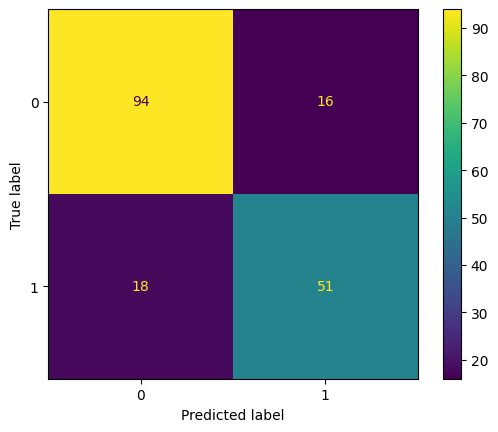

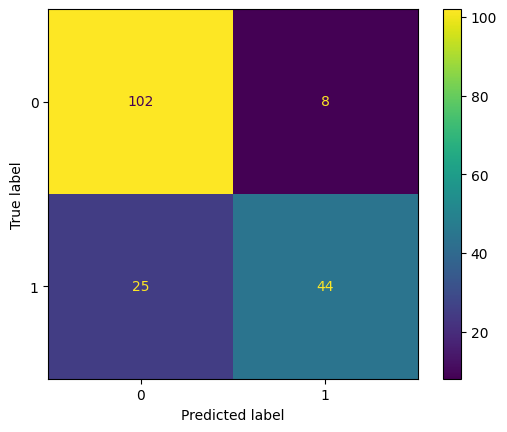

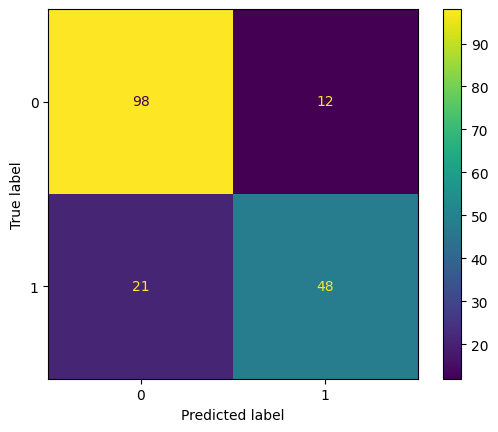

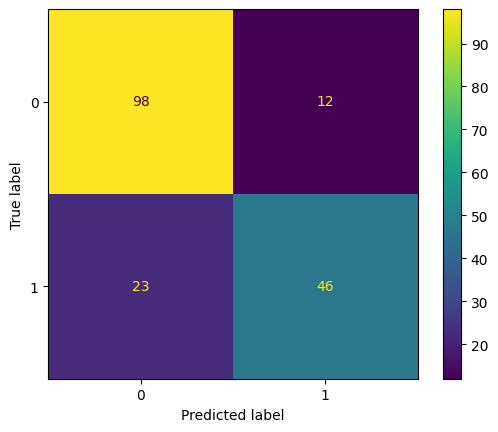

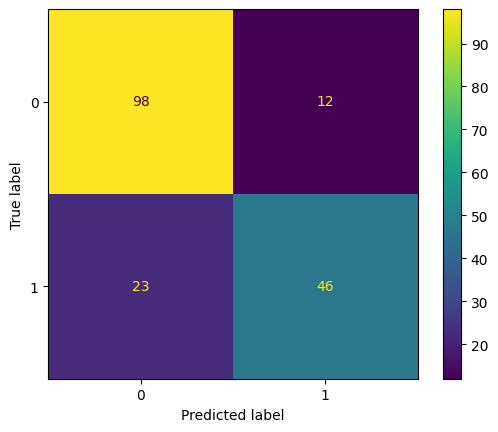

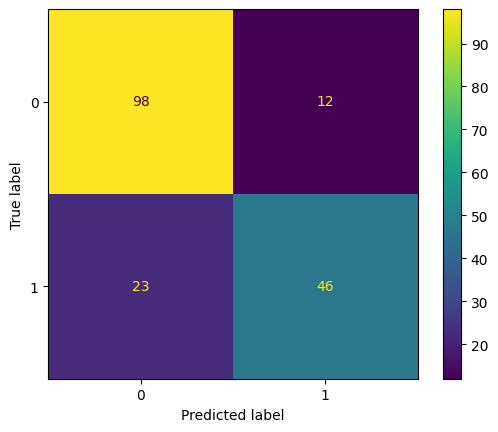

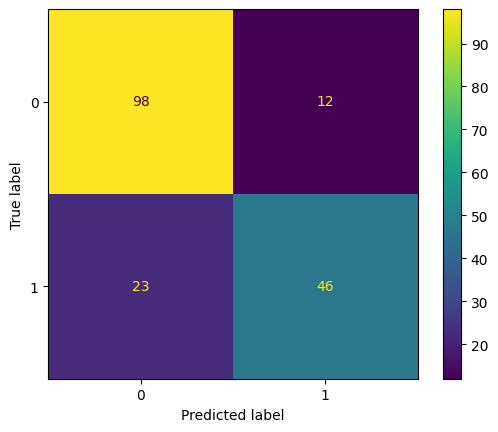

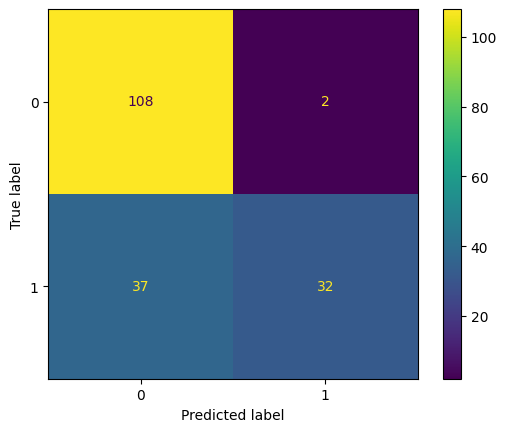

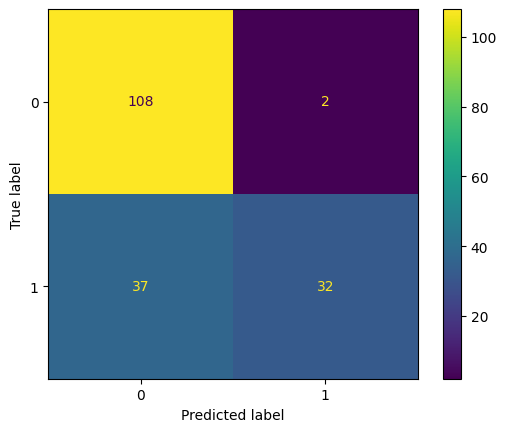

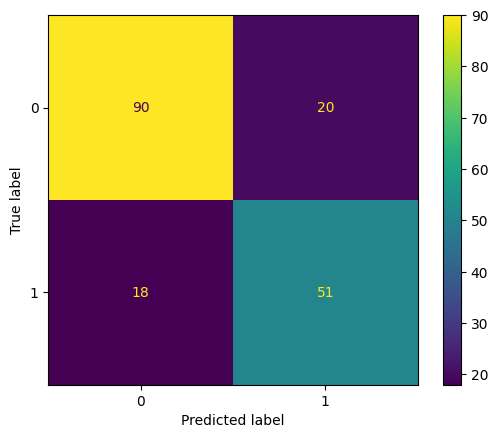

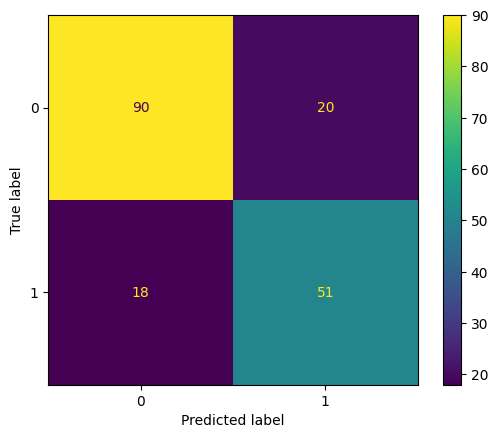

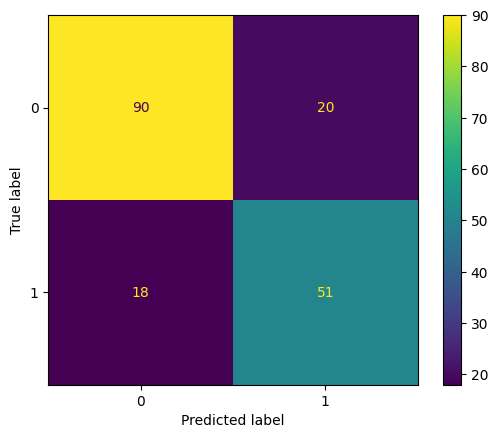

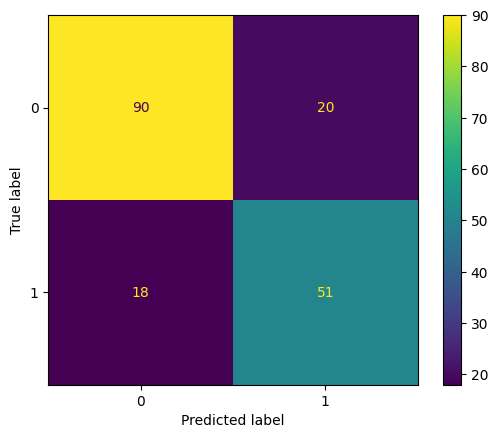

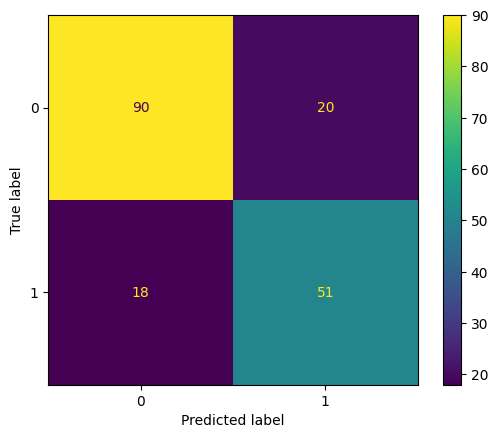

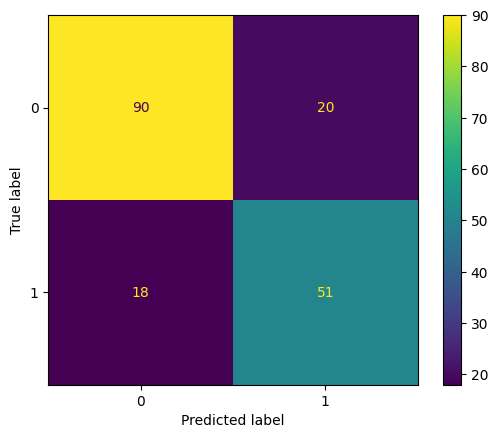

In [300]:
# indução do modelo de classificação por árvore de decisão
#ccp_alphas = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
ccp_alphas = [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.055, 0.06, 0.07, 0.08, 0.09, 0.1]
#ccp_alphas = [0.055]
#ccp_alphas = [0.4]

for ccp_i in ccp_alphas:
    modelo = DTC(random_state=42
                ,criterion='entropy'  # 'gini', 'entropy', 'log_loss'
                ,min_samples_split=2  # default 2
                ,min_samples_leaf=1   # default 1
                ,max_leaf_nodes=None  # default None
                ,class_weight=None    # default None. 'balanced' para equilibrar classes
                ,ccp_alpha=ccp_i        # default 0.0 Valores na documentação 0.005 0.01 0.015 0.02 0.025 0.03 0.035
                )
    modelo.fit(treino_X, treino_y)
    teste_pred_y = modelo.predict(teste_X)
    acuracia = acc_score(teste_y, teste_pred_y)
    resultado = cm(teste_y, teste_pred_y)

    cm_display = CMD(resultado).plot()
    print('Alpha=', ccp_i,' Acuracia=', acuracia)

> o Melhor  valor de alpha ***`Alpha= 0.01  Acuracia= 0.8156424581005587`*** encontrado mostra que uma árvore levemente podada generaliza melhor do que uma árvore complexa ou excessivamente simplificada

Como exmeplo o ***Alpha 0.0 --> Acurácia ~0.799***
Árvore sem poda, mais complexa, mas não necessariamente melhor.

-Alpha pequeno (0.01) → ***Acurácia --> 0.816***
Aqui foi atingido o melhor resultado: a árvore foi simplificada, possivelmente evitando overfitting, e generalizou melhor.

-Alpha médio (0.015–0.03) -->  ***Acurácia --> 0.804***
Boa, mas já começa a perder um pouco de performance

• 	Alpha alto (=> 0.04) → ***Acurácia cai para --> 0.78***
A árvore fica muito podada, perde poder de discriminação e a acurácia cai


>- Usando: `Bagging`

Acuracia=0.827
CPU times: total: 750 ms
Wall time: 750 ms


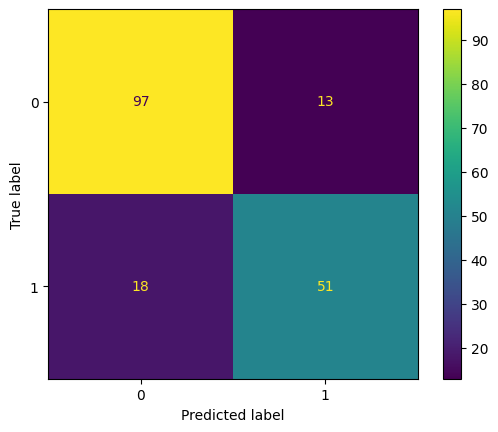

In [301]:
%%time
# indução do modelo
Classbase = DTC()
modeloBClass = BClass(estimator=Classbase  # qual o estimador de base a usar
                      ,n_estimators = 300        # número de estimadores
                      ,max_features = 1.0       # número (int) ou proporção de features
                                                # a usar pelo estimador
                      ,bootstrap = True         # se amostras são com substituição ou não
                      ,random_state=0           # controla a reamostragem, amostragem com reposição
                      )                         # tem outros parâmetros...
modeloBClass.fit(treino_X, treino_y)
teste_pred_y_BClass = modeloBClass.predict(teste_X)
acuracia = acc_score(teste_y, teste_pred_y_BClass)
resultado = cm(teste_y, teste_pred_y_BClass)
cm_display = CMD(resultado).plot()
print('Acuracia={:.3}'.format(acuracia))

- Dessa forma, para esse dataset, tilizando o ***BaggingClassifier*** para Árvore de Decisão simples, reduz a variância do modelo, combinando várias árvores treinadas em subconjuntos diferentes de dados;

- Mostra que os comitês de aprendizes realmente generalizaram melhor do que um único classificador

> Testando a utilização de outros Modelos: KNN, RANDOM FOREST, DUMMY, NAIVE BAYES

In [302]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

> Modelo Dummy:

Dummy Acuracia = 0.4972067039106145


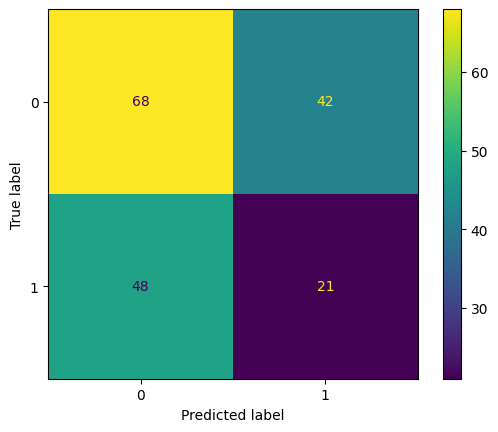

In [303]:
modelo_dummy= DummyClassifier(strategy='stratified', random_state=42)
modelo_dummy.fit(treino_X, treino_y)
teste_pred_y_dummy = modelo_dummy.predict(teste_X)
acuracia_dummy = acc_score(teste_y, teste_pred_y_dummy)
resultado_dummy = cm(teste_y, teste_pred_y_dummy)
CMD(resultado_dummy).plot()
print("Dummy Acuracia =", acuracia_dummy)


- Como no Titanic a proporção de classes é cerca de 62% sobreviveram e 38% Não sobreviveram, o Dummy com o Parâmetro `stratifield` tenta manter essa proporção

> kNN-Classifier

KNN Acuracia = 0.8100558659217877


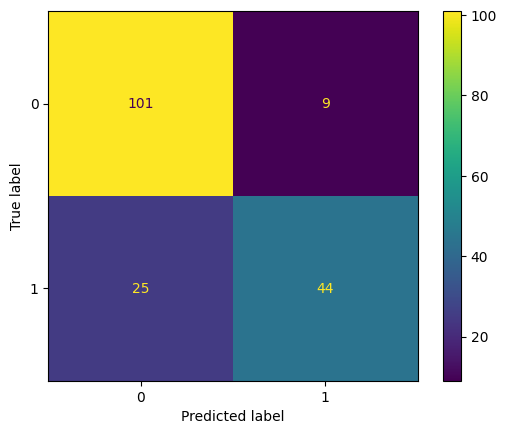

In [304]:
modelo_knn = KNeighborsClassifier(n_neighbors=8, weights='uniform', p=2)  # valores default
modelo_knn.fit(treino_X, treino_y)
teste_pred_y_knn = modelo_knn.predict(teste_X)

acuracia_knn = acc_score(teste_y, teste_pred_y_knn)
resultado_knn = cm(teste_y, teste_pred_y_knn)
CMD(resultado_knn).plot()
print("KNN Acuracia =", acuracia_knn)

> Random Forest

Random Forerst Acurácia=  0.8100558659217877


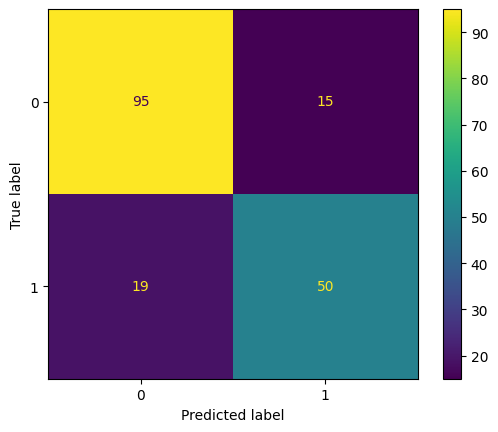

In [305]:
modelo_rf = RandomForestClassifier(n_estimators=350, random_state=42)
modelo_rf.fit(treino_X, treino_y)
teste_pred_y_rf = modelo_rf.predict(teste_X)

acuracia_rf = acc_score(teste_y, teste_pred_y_rf)
resultado_rf = cm(teste_y,teste_pred_y_rf)
CMD(resultado_rf).plot()
print("Random Forerst Acurácia= ", acuracia_rf)

> Naive Bayes

Naive Bayes Acuracia : 0.8044692737430168


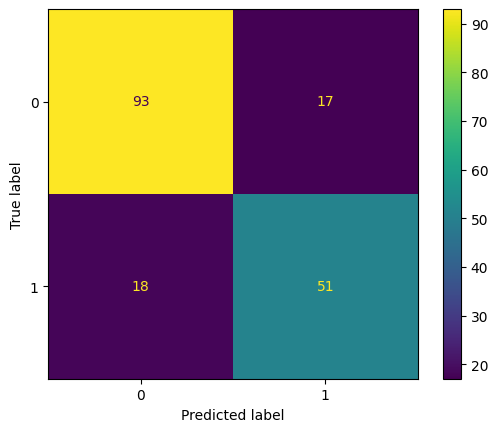

In [306]:
modelo_nb = GaussianNB()
modelo_nb.fit(treino_X, treino_y)
teste_pred_y_nb = modelo_nb.predict(teste_X)

acuracia_nb = acc_score(teste_y, teste_pred_y_nb)
resultado_nb = cm(teste_y, teste_pred_y_nb)
CMD(resultado_nb).plot()
print("Naive Bayes Acuracia :", acuracia_nb)


> Usando o MLPClassifier

In [307]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Criando um modelo básico de rede neural
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  #camada oculta com 100 neurônios
    activation='relu',          #função de ativação
    solver='adam',              #otimizador
    max_iter=500,               #número máximo de iterações
    random_state=42
)


MLPClassifier Acuracia = 0.8156424581005587


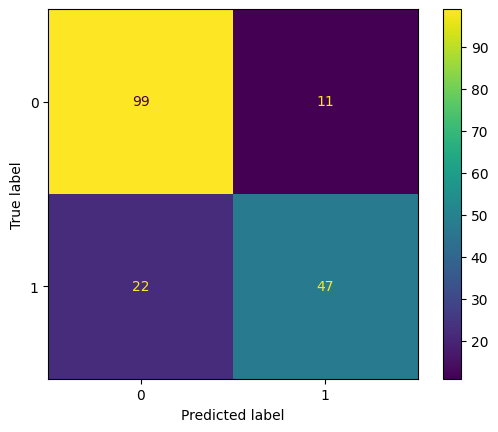

In [308]:
mlp.fit(treino_X, treino_y)
teste_pred_y_mlp = mlp.predict(teste_X)
acuracia_mlp = accuracy_score(teste_y, teste_pred_y_mlp)
resultado_mlp = confusion_matrix(teste_y, teste_pred_y_mlp)
ConfusionMatrixDisplay(resultado_mlp).plot()

print("MLPClassifier Acuracia =", acuracia_mlp)

#### > Usando outro modelo de Comitês de Aprendizes: `GradientBoosting` que:
    - ( Gradiente Booting se diferencia dessa abordagem por conta: Não faz amostragem (sempre o conjunto de dados original) não guarda os valores de pesos (ele considera a diferença entre valor real e valor predito), atribuí a média ou moda, no primeiro round, sendo classificação ou regressão e nos próximos rounds ele procura reduzir o erro para que a medida que cada round passa, se consegue induzir modelos mais próximos do valor que se quer predizer

Acuracia=0.821
CPU times: total: 625 ms
Wall time: 624 ms


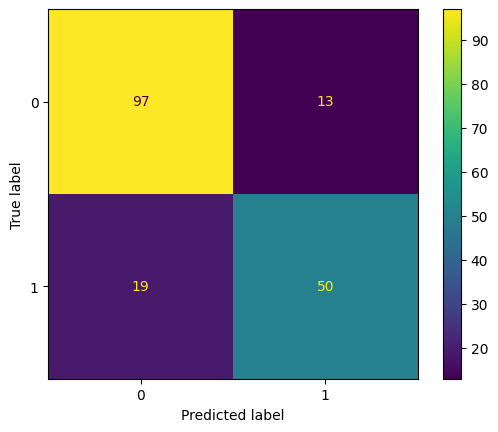

In [309]:
%%time
# indução do modelo
modeloGBClass = GBClass(n_estimators = 500        # número de estimadores
                      ,max_features = 1.0       # número (int) ou proporção de features
                      ,random_state=0           # controla a reamostragem
                      )                         # tem outros parâmetros...
modeloGBClass.fit(treino_X, treino_y)
teste_pred_y_GBClass = modeloGBClass.predict(teste_X)
acuracia = acc_score(teste_y, teste_pred_y_GBClass)
resultado = cm(teste_y, teste_pred_y_GBClass)
cm_display = CMD(resultado).plot()
print('Acuracia={:.3}'.format(acuracia))

In [310]:
print("MLP:", confusion_matrix(teste_y, teste_pred_y_mlp))
print("NB:", confusion_matrix(teste_y, teste_pred_y_nb))
print("RF:", confusion_matrix(teste_y, teste_pred_y_rf))


MLP: [[99 11]
 [22 47]]
NB: [[93 17]
 [18 51]]
RF: [[95 15]
 [19 50]]


#### 2) Definição do cojunto de hiper-parâmetros a serem explorados (use GridSearch) Link de referência: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html


#### - Dado os modelos que foram testados, irei prosseguir com os modelos:
- Decision Tree
- Random Forest
- MLP
- KNN
-GradientBoostingClassifier
- E o Dummy para ser utilizado como baseline: - ´*O DummyClassifier é utilizado como baseline. Ele não aprende padrões dos dados, apenas gera previsões aleatórias ou constantes. Por isso, não há hiperparâmetros a serem ajustados com GridSearch. Seu papel é mostrar o desempenho mínimo esperado, servindo como referência para avaliar se os modelos reais estão de fato aprendendo*´.


#### - Decision Tree:

- Principais Hiperparâmetros:
    - max_depth: Controla a profundidade máxima da árvore (evitando overfitting)
    - min_samples_split: Controla o número mínimo de amostras para dividir um nó;
    - min_samples_leaf: Número mínimo de amostras em cada folha.
    - criterion: função de impureza (gini/entropy)


In [311]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#### - Random Forest:

- Principais Hiperparâmetros:
    -n_estimators: número de árvores no ensemble;
    -max_depth: profundidade máxima de cada árvore;
    - min_samples_split: Mínimo de amostras para dividir um nó;
    -max_features: Número de variáveis consideradas em cada split
* *Decisão*: Variar número de árvores e profundida para ver impacto na generalização:

In [312]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

- KNN- *k-Nearest Neighbors*

    - n_neighbors: número de vizunhos considerados
    - 'weights':peso dos vizinhos
    - 'p': métrica de distância (1=Manhattan, 2=Euclidiana)


In [313]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

- MLPCLassifier (rede_neural):

    - hidden_layer_sizes: Número e tamanho das camadas ocultas
    - activation: função de ativação (relu, tanh)
    - solver: algoritmo de otimização (adam, ibfgs)
    - alpha: parâmetro de regularização/evitar overfiting

In [314]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01]
}


- #### Dessa forma, consigo fazer uma Breve Conclusão do melhor algoritmo para este dataset (dado que não calibrei a hiperparametrização dos números de estimadores iguais, quando possíveis, em relação aos outros algoritmos para que os resultados sejam justos) foi o Algoritmo do comitês de aprendizes: `GradientBoosting`, devido a:

    - Diferentemente do Bagging/Random Forest, o GB não realiza amostragem aleatória, conforme visto nas aulas, ele realiza o dataset completo.
    - Ele constrói as árvrores sequencialmentem cada uma corrigindo os erros da anterior, o que permite capturar padrões mais sutis e reduzir o erro gradualmente.

- Dentre a única métrica de avaliação utilizada para comparar o resultado de acurácia dos algoritmos executadas, o GB foi o que obteve a maior taxa, de: *84.9%*, dado o número de estimadores ***n_estimators=500***

#### **3)** Execução da exploração dos hiper-parâmetros e escolhe dos melhores estimadores

- Divisão dos subconjunto de dados de treino e teste, com estratificação

- Agora, você precisa dividir os dados em subconjuntos de treino e teste. Para isso, você também deve fazer a divisão com a estratificação da coluna alvo.

- O treinamento e teste devem ser feitos usando a técnica de validação cruzada.

#### 1) Divisão do dataset em treino e teste, com estratificação- 
#### 2-)xecução do treinamento e validação com Cross-Validation

#### >  Começando a Execução dos algoritmos para Hiperparametrização decladarada anteriormente, antes de iniciar a validação com estratificação:

In [315]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV


> #### Hiperparametrização: `GradientBoostingClassifier`

In [316]:
param_grid_gb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

gb = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')
grid.fit(treino_X, treino_y)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia (CV):", grid.best_score_)
print("Acurácia no teste:", acc_score(teste_y, grid.best_estimator_.predict(teste_X)))


Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 1.0}
Melhor acurácia (CV): 0.8440263961390722
Acurácia no teste: 0.8212290502793296


> #### Hiperparametrização: `DecisionTreeClassifier`

In [317]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,                # validação cruzada em 5 folds
    scoring='accuracy',  # métrica de avaliação
    n_jobs=-1            # usa todos os núcleos da máquina para acelerar
)


In [318]:
grid_dt.fit(treino_X, treino_y)

print("Melhores parâmetros:", grid_dt.best_params_)
print("Melhor acurácia (CV):", grid_dt.best_score_)


Melhores parâmetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor acurácia (CV): 0.8271939328277357


Acurácia no teste: 0.8268156424581006


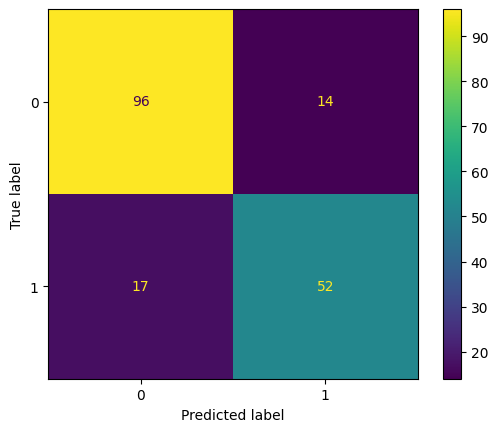

In [319]:
teste_pred_y_dt = grid_dt.best_estimator_.predict(teste_X)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Acurácia no teste:", accuracy_score(teste_y, teste_pred_y_dt))

resultado_dt = confusion_matrix(teste_y, teste_pred_y_dt)
ConfusionMatrixDisplay(resultado_dt).plot()


> #### Hiperparametrização: `Random  Forest`

In [320]:
import math

In [321]:
param_grid_rf = {
    'n_estimators': [50,100,200,300], #Número de Árvores
    'max_depth':[None,10,20,30], #Profundidad máxima
    'min_samples_split': [2,5], #Número de Amostras para dividir
    'max_features': ['sqrt', 'log2'] #número de variáveis conisderadas em cada split
}

#Modelo base:

rf = RandomForestClassifier(random_state=42)

#GridSearchCV

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid= param_grid_rf,
    cv=5,                       # Validação cruzada em 5 folds
    scoring= 'accuracy',       # Métrica de avaliação 
    n_jobs=-1                  # Usando todos os Núcleos da minha máquina para acelerar
)

In [322]:
grid_rf.fit(treino_X, treino_y)

print("Melhores parâmetros:", grid_rf.best_params_)
print("Melhor acurácia (CV):", grid_rf.best_score_)


Melhores parâmetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Melhor acurácia (CV): 0.8313995863291638


In [323]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Acurácia no Teste:  0.8156424581005587


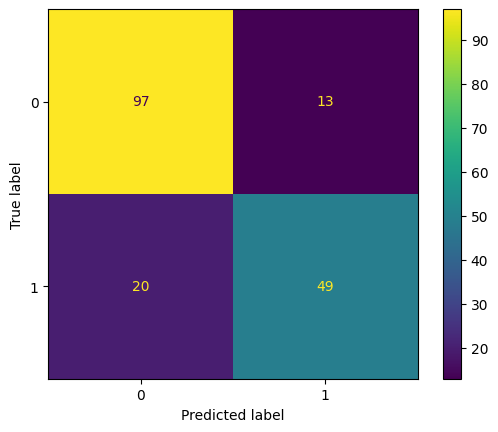

In [324]:
teste_pred_y_rf = grid_rf.best_estimator_.predict(teste_X)
print("Acurácia no Teste: ", accuracy_score(teste_y,teste_pred_y_rf ))
resultado_rf = confusion_matrix(teste_y, teste_pred_y_rf)
ConfusionMatrixDisplay(resultado_rf).plot()

> #### Hiperparametrização: `Knn`

In [325]:
# grade de hiperparâmetros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 8, 11, 15],   # número de vizinhos
    'weights': ['uniform', 'distance'],    # peso dos vizinhos
    'p': [1, 2]                            # métrica de distância (1=Manhattan, 2=Euclidiana)
}

# modelo base
knn = KNeighborsClassifier()

# GridSearchCV
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,                # validação cruzada em 5 folds
    scoring='accuracy',  # métrica de avaliação
    n_jobs=-1            # usa todos os núcleos da máquina para acelerar
)


In [326]:
grid_knn.fit(treino_X, treino_y)

print("Melhores parâmetros:", grid_knn.best_params_)
print("Melhor acurácia (CV):", grid_knn.best_score_)


Melhores parâmetros: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Melhor acurácia (CV): 0.8145474244065793


Acurácia no teste: 0.7653631284916201


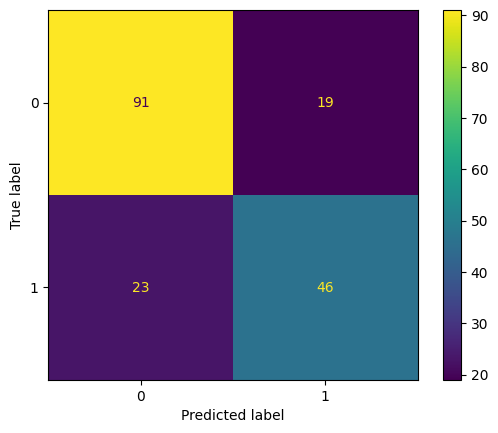

In [327]:
teste_pred_y_knn = grid_knn.best_estimator_.predict(teste_X)

print("Acurácia no teste:", accuracy_score(teste_y, teste_pred_y_knn))
resultado_knn = confusion_matrix(teste_y, teste_pred_y_knn)
ConfusionMatrixDisplay(resultado_knn).plot()


> #### Hiperparametrização: `MLP`/*Rede Neural*

In [328]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],  # número e tamanho das camadas ocultas
    'activation': ['relu', 'tanh'],                  # função de ativação
    'solver': ['adam', 'lbfgs'],                     # algoritmo de otimização
    'alpha': [0.0001, 0.001, 0.01]                   # regularização L2
}

# modelo base
mlp = MLPClassifier(max_iter=1000, random_state=42)

# GridSearchCV
grid_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=5,                # validação cruzada em 5 folds
    scoring='accuracy',  # métrica de avaliação
    n_jobs=-1            # usa todos os núcleos da máquina para acelerar
)


In [329]:
grid_mlp.fit(treino_X, treino_y)

print("Melhores parâmetros:", grid_mlp.best_params_)
print("Melhor acurácia (CV):", grid_mlp.best_score_)


Melhores parâmetros: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Melhor acurácia (CV): 0.8215601300108343


Acurácia no teste: 0.8100558659217877


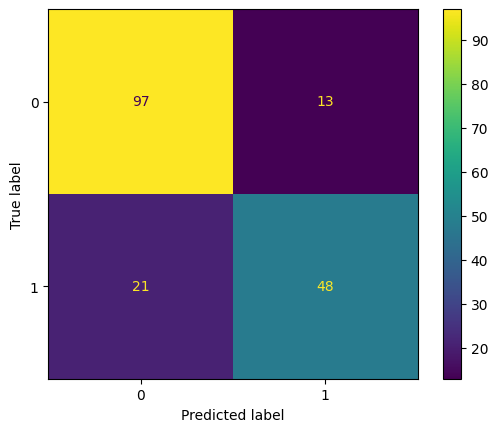

In [330]:
teste_pred_y_mlp = grid_mlp.best_estimator_.predict(teste_X)

print("Acurácia no teste:", accuracy_score(teste_y, teste_pred_y_mlp))
resultado_mlp = confusion_matrix(teste_y, teste_pred_y_mlp)
ConfusionMatrixDisplay(resultado_mlp).plot()



#### ***3.2***-) Execução do treinamento e validação com Cross-Validation

- Mesmo que o GridSearchCV use internamete a validação cruzada (por exemplo, cv=5) para escolher os melhores hiperparâmetrosm, ainda não foi feito uma validação cruzada final comparando todos os modelos com as métricas necessárias: metrics = {
    'accuracy': 'Accuracy',
    'f1': 'F1-Score',
    'roc_auc': 'ROC-AUC',
    'precision': 'Precision',
    'recall': 'Recall'
}

#### > Realizando o Cross-Validation Geral

- KFold(n_splits=10, shuffle=True, random_state=42)

In [331]:
from sklearn.model_selection import KFold, cross_validate


In [332]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

metrics = {
    'accuracy': 'Accuracy',
    'f1': 'F1-Score',
    'roc_auc': 'ROC-AUC',
    'precision': 'Precision',
    'recall': 'Recall'
}

results = []


> Modelos utilizados, usados com os melhores Hiperparâmetros:

In [333]:
modelos_final = [
    ("Dummy", DummyClassifier(strategy='stratified', random_state=42)),
    ("Decision Tree: ", grid_dt.best_estimator_),
    ("Random Forest", grid_rf.best_estimator_),
    ("KNN", grid_knn.best_estimator_),
    ("MLP", grid_mlp.best_estimator_),
    ("Gradient Boosting", grid.best_estimator_) 
]

print("CONFIGURAÇÃO DA VALIDAÇÃO:")
print(f"   • Método: KFold (10 splits)")
print(f"   • Métricas: {list(metrics.keys())}")
print(f"   • Random State: 42")

# Aplicar validação cruzada
for nome, modelo in modelos_final:
    print(f"   Processando {nome}...")
    metric_results = cross_validate(
        modelo,
        X=treino_X,
        y=treino_y,
        cv=kfold,
        scoring=list(metrics.keys()),
        return_train_score=False,
        n_jobs=-1
    )
    metric_results['modelo'] = [nome] * len(metric_results['fit_time'])
    results.append(pd.DataFrame(metric_results))
    print(f"       {nome} - Concluído")

# Consolidar resultados
final_results = pd.concat(results, axis=0, ignore_index=True)
print(f"   Total de repetições de validação cruzada: {len(final_results)}")



CONFIGURAÇÃO DA VALIDAÇÃO:
   • Método: KFold (10 splits)
   • Métricas: ['accuracy', 'f1', 'roc_auc', 'precision', 'recall']
   • Random State: 42
   Processando Dummy...
       Dummy - Concluído
   Processando Decision Tree: ...
       Decision Tree:  - Concluído
   Processando Random Forest...
       Random Forest - Concluído
   Processando KNN...
       KNN - Concluído
   Processando MLP...
       MLP - Concluído
   Processando Gradient Boosting...
       Gradient Boosting - Concluído
   Total de repetições de validação cruzada: 60


In [334]:
# @title
# Calcular estatísticas por modelo
modelo_stats = []

for modelo_nome in final_results['modelo'].unique():
    modelo_data = final_results[final_results['modelo'] == modelo_nome]

    stats = {
        'Modelo': modelo_nome,
        'Amostras': len(modelo_data)
    }

    # Calcular médias e desvios padrão para cada métrica
    for metric_key, metric_name in metrics.items():
        test_score_key = f'test_{metric_key}'
        if test_score_key in modelo_data.columns:
            mean_score = modelo_data[test_score_key].mean()
            std_score = modelo_data[test_score_key].std()
            stats[f'{metric_name}'] = f"{mean_score:.4f} ± {std_score:.4f}"
            stats[f'{metric_name}_mean'] = mean_score
            stats[f'{metric_name}_std'] = std_score

    # Tempo de treinamento
    stats['Tempo_Treino(s)'] = f"{modelo_data['fit_time'].mean():.2f}"

    modelo_stats.append(stats)

In [335]:
## Criar DataFrame de estatísticas
df_stats = pd.DataFrame(modelo_stats)

# Ordenar por F1-Score (métrica principal)
df_stats = df_stats.sort_values('F1-Score_mean', ascending=False)

print("\n DESEMPENHO DOS MODELOS (KFold - 10 splits):")
colunas_display = ['Modelo', 'Accuracy', 'F1-Score', 'ROC-AUC', 'Precision', 'Recall', 'Tempo_Treino(s)']
print(df_stats[colunas_display].to_string(index=False))


 DESEMPENHO DOS MODELOS (KFold - 10 splits):
           Modelo        Accuracy        F1-Score         ROC-AUC       Precision          Recall Tempo_Treino(s)
Gradient Boosting 0.8399 ± 0.0407 0.7844 ± 0.0513 0.8871 ± 0.0472 0.8049 ± 0.0762 0.7747 ± 0.0846            0.35
    Random Forest 0.8343 ± 0.0439 0.7753 ± 0.0569 0.8902 ± 0.0394 0.8091 ± 0.0987 0.7599 ± 0.0975            0.50
  Decision Tree:  0.8301 ± 0.0547 0.7726 ± 0.0749 0.8663 ± 0.0515 0.7854 ± 0.1026 0.7692 ± 0.0888            0.00
              MLP 0.8203 ± 0.0383 0.7432 ± 0.0496 0.8704 ± 0.0369 0.8133 ± 0.0768 0.6913 ± 0.0768            1.60
              KNN 0.7992 ± 0.0513 0.7393 ± 0.0718 0.8480 ± 0.0411 0.7318 ± 0.1059 0.7619 ± 0.1012            0.00
            Dummy 0.5435 ± 0.0603 0.3442 ± 0.0996 0.5012 ± 0.0663 0.3874 ± 0.1387 0.3165 ± 0.0843            0.00


#### <a href="Resultados&Conclusão">Resultados</a> |

#### ***4)*** Análise dos resultados

- Após a execução do treinamento e validação, irei coletar as métricas de validação para problemas de classificação e compará-las entre os algoritmos.

Plotagem das métricas:

  - Acurácia;
  - Precisão;
  - Recall;
  - F1-Score;
---

##### > De acordo com a execução dos meus modelos, após validação cruzada usando o K-fold (por seu um conjunto de dados pequeno);

- O Melhor modelo executado para esse conjunto de dados, dado a: Hiperparametrização, validação cruzada e todos processos que foram executados, foi o **Gradient Boosting**, no qual obtieve a melhor taxa de Acurácia: 83%, O F1-SCORE 78% e Sensibilidade com 77%; Tais valores indicam que o algoritmo conseguiu equilibrar bem a capacidade de identificar corretamente os sobreviventes e os não sobreviventes, sendo o mais robusto entre os algoritmos testados.
- O segundo Modelo do Ranking o Random Forest, apresentou os resultados com uma taxa de acurácia de 82%, o que é relativamente próxima e  superou o GradientBoostingClassifier nas métrias de: Precisão com 80% & ROC-AUC com 89%; Mostrando também boa capacidade de discriminação entre as classes;

- Os demais modelos testados para este Dataset: Decision Tree, MLPClassifier e KNN, também apresentaram resultaods considerados aceitáveis, visto que: com exceção do KNN (79.64%), todos eles obtiveram os valores acima de 80%, tal que: entre ~81 e 82%(MLP), o que é próximo do GradientBoostingClassifier. Já o Dummy Classifier, utilizado como modelo baseline, obteve apenas 54.35% de acurácia, o que confirma que os modelos de aprendizado supervisionado, conseguiram sim extrair padrões relevantes dos dados.

Dado que o problema do dataset, é resolver um problema de classificação com intuito de  predizer dentre os passageiros abordo quem sobreviveu ou não. As métricas  com maior relevância e seus resultados, são as de *ROC-AUC e *Recall*. O ROC-AUC mede a capacidade do modelo em distinguir corretamente sobreviventes de não sobreviventes em diferentes limiares de decisão, ao passo  que o Recall indica a proporção de sobreviventes corretamente identificados. No caso do dataset do Titanic, errar a predição de sobreviventes é mais crítico do que errar não sobreviventes, ou seja os Falsos Negativo, o que torna a Sensibilidade uma métrica de grande importância

- Dessa forma, considerando tudo explicitado acima, acrescido ao tempo de Execução para rodar e encontrar a melhor hiperparametrização do GradientBoosting, é necessário criterizar o custo de execução em máquina local, no qual pessoalmente, foi relativamente alto em minha máquina local: cerca de (**5 minutos e 41 s**), conforme a captura de tela abaixo, os melhores modelos a serem usados neste dataset dado todas as modificações e pré-processamentos realizados anteriormente a se executar os modelos, foram: `***Random Forest e GradientBoostingClassifier***`

---
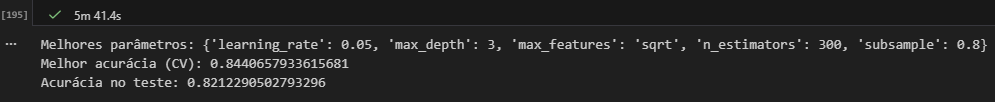


> Exemplo de visualização:

In [336]:
import plotly.express as px

In [337]:
# Ordenar os modelos pelo F1-Score

df_plot = df_stats.sort_values('F1-Score_mean', ascending=True)

# Selecionar Métricas principais

metrics_plot = ['Accuracy_mean', 'F1-Score_mean', 'ROC-AUC_mean', 'Precision_mean']
labels = ['Accuracy', 'F1-Score', 'ROC-AUC', 'Precision']


#Transformando o dataframe com os resultados para o formato Longo (melt)

df_long = df_plot.melt(
    id_vars=['Modelo'],
    value_vars=metrics_plot,
    var_name= 'Métrica',
    value_name='Score'
)

#Mapeando nomes:

metric_map = dict(zip(metrics_plot, labels))
df_long['Métrica'] = df_long['Métrica'].map(metric_map)

#Plotando o gráfico de barras horizontal com uma cor para cada métrica:

fig = px.bar(
    df_long,
    x="Score",
    y="Modelo",
    color="Métrica",
    orientation='h',
    barmode="group",
    title='Comparação de Desempenho dos Modelos (Validação Cruzada KFold - 10 splits)',
    color_discrete_sequence=['#1f77b4','#ff7f0e','#2ca02c','#d62728']
)

# Ajustando Layout:

fig.update_layout(
    xaxis_title="Score",
    yaxis_title="Modelos",
    legend_title="Métricas",
    bargap=0.25,
    height=650,
    width=920

)

fig.show()


#### Gráfico de Heatmap:

In [338]:
from turtle import color
from seaborn import heatmap


metrics_heatmap = ['Accuracy_mean', 'F1-Score_mean', 'ROC-AUC_mean', 'Precision_mean']
labels =['Accuracy', 'F1-Score', 'ROC-AUC', 'Precision']

#Criando um dicionário para renomear as métricas:

metric_map = dict(zip(metrics_heatmap,labels))

#Criando dataframe apenas com modelos e métricas:

heatmap_data = df_stats[['Modelo'] + metrics_heatmap].copy()

#Renameando as colunas:

heatmap_data.rename(columns=metric_map, inplace=True)

#Transformando em matriz: modelos x métricas:

heatmap_matrix = heatmap_data.set_index('Modelo')

fig = px.imshow(
    heatmap_matrix,
    labels = dict(x="Métricas", y="Modelos", color="Score"),
    x=heatmap_matrix.columns,
    y=heatmap_matrix.index,
    color_continuous_scale='Viridis',
    aspect="auto",
    title="Matriz de Calor do Desempenho dos Modelos (Validação Cruzada KFold-10 splits)"
)

# Ajustando Layout:
fig.update_layout(
    height=600,
    width=800,
    xaxis_title="Métricas",
    yaxis_title="Modelos"
)

fig.show()

### > Conclusão do Trabalho e Discussão:



***Dificuldades enfrentadas***: Obtive muita dificuldade em utilizar o GridSearchCV para Hiperparametrização dos modelos, é primeiro projeto que realizo e executo desta forma, pois pessoalmente não consigo afirmar se os algoritmos de IA utilizados apresentaram under ou overfiting, com *PRECISÃO*... Pois os resultados foram muito próximos entre eles, com execeção do Dummy é claro. Portanto, mesmo usando a documentação de apoio no Sklearn, ainda obtive muita insegurança na execução do trabalho, asssim, utilizei formente como base um outro projeto de Machine Learning que possuo em meus projetos (feitos a partir de um bootcamp).



#### > Próximos Passos (melhorias acerca das limitações):

1. *Explorar ensembles mais modernos*
2. *Aprimorar a engenharia de atributos*
3.*Aplicar técnicas de balanceamento*
4.*Utilizar **PIPELINE**, para automatizar e padronização, como Pipeline e ColumnTransformer*
5.*Avaliar a interpretabilidade*
6. *Compararar desempenho em ambientes mais robustos*